# Kiva - Data Visualization Tools

<img src="images/kiva.jpg"/>

**Kiva.org** is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

Data source: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding

### General Libraries 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load in kiva_loans.csv as df
df = pd.read_csv("data/kiva_loans.csv")

df.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00            12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00            11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00            43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00            11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00            14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [3]:
#check the summary of the data
df.describe()

id  funded_amount    loan_amount     partner_id  \
count  6.712050e+05  671205.000000  671205.000000  657698.000000   
mean   9.932486e+05     785.995061     842.397107     178.199616   
std    1.966113e+05    1130.398941    1198.660073      94.247581   
min    6.530470e+05       0.000000      25.000000       9.000000   
25%    8.230720e+05     250.000000     275.000000     126.000000   
50%    9.927800e+05     450.000000     500.000000     145.000000   
75%    1.163653e+06     900.000000    1000.000000     204.000000   
max    1.340339e+06  100000.000000  100000.000000     536.000000   

       term_in_months   lender_count  
count   671205.000000  671205.000000  
mean        13.739022      20.590922  
std          8.598919      28.459551  
min          1.000000       0.000000  
25%          8.000000       7.000000  
50%         13.000000      13.000000  
75%         14.000000      24.000000  
max        158.000000    2986.000000

In [4]:
# Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [5]:
# Drop all the null values and save the new datafarame in df_dropped
# check the info of the dropped dated
df_dropped = df.dropna()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  423081 non-null  int64  
 1   funded_amount       423081 non-null  float64
 2   loan_amount         423081 non-null  float64
 3   activity            423081 non-null  object 
 4   sector              423081 non-null  object 
 5   use                 423081 non-null  object 
 6   country_code        423081 non-null  object 
 7   country             423081 non-null  object 
 8   region              423081 non-null  object 
 9   currency            423081 non-null  object 
 10  partner_id          423081 non-null  float64
 11  posted_time         423081 non-null  object 
 12  disbursed_time      423081 non-null  object 
 13  funded_time         423081 non-null  object 
 14  term_in_months      423081 non-null  float64
 15  lender_count        423081 non-nul

In [6]:
# How many records have been lost as a result of dropping all the null values (records lost)
671205 - 423081 

248124

In [7]:
# check for any null values
df.isnull().any()

id                    False
funded_amount         False
loan_amount           False
activity              False
sector                False
use                    True
country_code           True
country               False
region                 True
currency              False
partner_id             True
posted_time           False
disbursed_time         True
funded_time            True
term_in_months        False
lender_count          False
tags                   True
borrower_genders       True
repayment_interval    False
date                  False
dtype: bool

In [8]:
# Filling USE with RECORD UNKNOWN
df['use'].fillna("RECORD_UNKNOWN",inplace=True)

In [9]:
# Display the use column as a dataframe
df[['use']]

use
0                 To buy seasonal, fresh fruits to sell. 
1       to repair and maintain the auto rickshaw used ...
2       To repair their old cycle-van and buy another ...
3       to purchase an embroidery machine and a variet...
4                                to purchase one buffalo.
...                                                   ...
671200  [True, u'para compara: cemento, arenya y ladri...
671201  [True, u'to start a turducken farm.'] - this l...
671202                                     RECORD_UNKNOWN
671203  [True, u'to start a turducken farm.'] - this l...
671204  [True, u'to start a turducken farm.'] - this l...

[671205 rows x 1 columns]

In [10]:
# Filling region with Unknown_Region
df['region'].fillna("Unknown_Region",inplace=True)

In [11]:
# Display the region column as a dataframe
df[['region']]

region
0               Lahore
1               Lahore
2            Maynaguri
3               Lahore
4         Abdul Hakeem
...                ...
671200      Concepción
671201  Unknown_Region
671202  Unknown_Region
671203  Unknown_Region
671204  Unknown_Region

[671205 rows x 1 columns]

In [12]:
# Create a New column that contains the year from the date column
def create_year(x):
    year = pd.DatetimeIndex(x).year 
    return year

df['year'] = create_year(df['date'])
df.head(1)

id  funded_amount  loan_amount             activity sector  \
0  653051          300.0        300.0  Fruits & Vegetables   Food   

                                       use country_code   country  region  \
0  To buy seasonal, fresh fruits to sell.            PK  Pakistan  Lahore   

  currency  ...                posted_time             disbursed_time  \
0      PKR  ...  2014-01-01 06:12:39+00:00  2013-12-17 08:00:00+00:00   

                 funded_time term_in_months  lender_count  tags  \
0  2014-01-02 10:06:32+00:00           12.0            12   NaN   

  borrower_genders repayment_interval        date  year  
0           female          irregular  2014-01-01  2014  

[1 rows x 21 columns]

In [13]:
# Create a New column that contains the month from the date column
def create_month(x):
    month = pd.DatetimeIndex(x).month_name() 
    return month

df['month'] = create_month(df['date'])
df.head(1)

id  funded_amount  loan_amount             activity sector  \
0  653051          300.0        300.0  Fruits & Vegetables   Food   

                                       use country_code   country  region  \
0  To buy seasonal, fresh fruits to sell.            PK  Pakistan  Lahore   

  currency  ...             disbursed_time                funded_time  \
0      PKR  ...  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00   

  term_in_months lender_count  tags  borrower_genders repayment_interval  \
0           12.0           12   NaN            female          irregular   

         date  year    month  
0  2014-01-01  2014  January  

[1 rows x 22 columns]

In [14]:
# Create a New column that contains the day from the date column

def create_day(x):
    day = pd.DatetimeIndex(x).day_name() 
    return day

df['day'] = create_day(df['date'])
df.head(1)

id  funded_amount  loan_amount             activity sector  \
0  653051          300.0        300.0  Fruits & Vegetables   Food   

                                       use country_code   country  region  \
0  To buy seasonal, fresh fruits to sell.            PK  Pakistan  Lahore   

  currency  ...                funded_time term_in_months lender_count tags  \
0      PKR  ...  2014-01-02 10:06:32+00:00           12.0           12  NaN   

   borrower_genders  repayment_interval        date  year    month        day  
0            female           irregular  2014-01-01  2014  January  Wednesday  

[1 rows x 23 columns]

In [15]:
# Print the unique country names
df['country'].unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

In [16]:
# How many unique countries are there
df['country'].nunique()

87

In [17]:
# Create a dataframe called sectors that contains the count of the number of times a sector appears in the dataset
sectors = df.groupby('sector')['id'].count().sort_values(ascending=False).reset_index()
sectors.head()

sector      id
0   Agriculture  180302
1          Food  136657
2        Retail  124494
3      Services   45140
4  Personal Use   36385

In [18]:
# Rename the id column to count
sectors.columns = ['Sector','Count']
sectors.head()

Sector   Count
0   Agriculture  180302
1          Food  136657
2        Retail  124494
3      Services   45140
4  Personal Use   36385

In [19]:
# Create a dataframe called sector_loan that contains the count of the loan
# amounts per sector
sector_loan=df.groupby('sector')['loan_amount'].count().\
sort_values(ascending=False).reset_index()
sector_loan.head()

sector  loan_amount
0   Agriculture       180302
1          Food       136657
2        Retail       124494
3      Services        45140
4  Personal Use        36385

In [20]:
# Check the type of sector_loan
type(sector_loan)

pandas.core.frame.DataFrame

In [21]:
# Create a dataframe called usa that contains data from USA only
usa = df[df['country'] == 'United States']
usa.head(1)

id  funded_amount  loan_amount               activity sector  \
99  1080153         5000.0       5000.0  Food Production/Sales   Food   

                                                  use country_code  \
99  hire more staff to keep up with the volume of ...           US   

          country          region currency  ...                funded_time  \
99  United States  Unknown_Region      USD  ...  2014-03-11 05:53:06+00:00   

   term_in_months lender_count tags  borrower_genders  repayment_interval  \
99           30.0          261  NaN            female             monthly   

          date  year    month       day  
99  2014-01-02  2014  January  Thursday  

[1 rows x 23 columns]

In [22]:
# Create a pivot table that shows the sum of loan amounts per sector
pd.pivot_table(usa, values='loan_amount',columns=['sector'],aggfunc='sum')

sector       Agriculture       Arts   Clothing  Construction  Education  \
loan_amount    2999050.0  1351500.0  1957925.0      435900.0   870125.0   

sector       Entertainment       Food    Health   Housing  Manufacturing  \
loan_amount       776725.0  7209975.0  396450.0  242850.0       213300.0   

sector       Personal Use     Retail   Services  Transportation  Wholesale  
loan_amount      481775.0  4437450.0  9420300.0        597925.0   105125.0

In [23]:
# Load in the themes data as themes
themes = pd.read_csv('data/loan_theme_ids.csv')
themes.head()

id    Loan Theme ID          Loan Theme Type  Partner ID
0  638631  a1050000000skGl                  General       151.0
1  640322  a1050000000skGl                  General       151.0
2  641006  a1050000002X1ij         Higher Education       160.0
3  641019  a1050000002X1ij         Higher Education       160.0
4  641594  a1050000002VbsW  Subsistence Agriculture       336.0

In [24]:
# Display the columns in the themes dataset
themes.columns

Index(['id', 'Loan Theme ID', 'Loan Theme Type', 'Partner ID'], dtype='object')

In [25]:
# Display the columns in df
df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'year', 'month', 'day'],
      dtype='object')

In [26]:
# Merge the themes data frame with df
# and display the merged data frame
merger = pd.merge(df,themes, on='id')
merger.head(1)

id  funded_amount  loan_amount  activity          sector  \
0  653053          575.0        575.0  Rickshaw  Transportation   

                                                 use country_code   country  \
0  to repair and maintain the auto rickshaw used ...           PK  Pakistan   

   region currency  ...  tags borrower_genders repayment_interval        date  \
0  Lahore      PKR  ...   NaN   female, female          irregular  2014-01-01   

   year    month        day    Loan Theme ID Loan Theme Type Partner ID  
0  2014  January  Wednesday  a1050000000sjEC     Underserved      247.0  

[1 rows x 26 columns]

In [27]:
# Print the unique loan theme types
merger['Loan Theme Type'].unique()

array(['Underserved', 'General', nan, "Hai Duong Women's Union", 'Youth',
       'Green', 'Higher Education', 'Rural Inclusion', 'Startup',
       'Full Tuition', 'At-Risk Youth', 'Conflict Zone',
       'Extreme Poverty', 'Water', 'FUSAI', 'Subsistence Agriculture',
       'Agriculture', 'Housing Improvement', 'Unbanked',
       'Youth Entrepreneurship', 'Haiti', 'Vulnerable Populations',
       'Primary/Secondary Education', 'Vulnerable Women', 'Murabaha',
       'End Consumer Finance', 'Agricultural Equipment',
       'Mobile Transactions', 'Small Enterprise', 'Business in a Box',
       'Artisan', 'Murabaha Youth', 'Retailer Finance', 'Kiva City LA',
       'Organic Conversion', 'First/Second Chance', 'Disaster Recovery',
       'Agricultural Infrastructure', 'Women Without Poverty',
       'CAMEO Partnership', 'Safe Water System for Institution',
       'Rural Conflict Zone', 'Biodigester', 'SME',
       'Clients below the poverty line', 'Distributor Finance - India',
       'Busi

In [28]:
# Which are the most prominent loan themes by id count
merger.groupby('Loan Theme Type')['id'].count().\
sort_values(ascending=False).reset_index().head(5)

Loan Theme Type      id
0          General  337812
1      Underserved   52296
2      Agriculture   31526
3  Rural Inclusion   18637
4            Water   16304

## Visualization with MatplotLib

In [30]:
usa.head()

id  funded_amount  loan_amount               activity       sector  \
99   1080153         5000.0       5000.0  Food Production/Sales         Food   
116   653415         4000.0       4000.0        Cosmetics Sales       Retail   
231  1080154        10000.0      10000.0  Food Production/Sales         Food   
455   653761         5000.0       5000.0                Farming  Agriculture   
474   653803         5450.0       5450.0               Services     Services   

                                                   use country_code  \
99   hire more staff to keep up with the volume of ...           US   
116                 to purchase more inventory to sell           US   
231  outfit my new kitchen so that I can expand my ...           US   
455                              to purchase a tractor           US   
474                        to market her new business.           US   

           country                  region currency  ...  \
99   United States          Unknown_Region      USD  ...   
116  United States               San Diego      USD  ...   
231  United States          Unknown_Region      USD  ...   
455  United States        Pauma Valley, CA      USD  ...   
474  United States  Baton Rouge, Louisiana      USD  ...   

                   funded_time term_in_months lender_count  \
99   2014-03-11 05:53:06+00:00           30.0          261   
116  2014-01-17 19:56:39+00:00           26.0           93   
231  2014-02-20 12:08:03+00:00           36.0          280   
455  2014-01-13 19:33:49+00:00           32.0          158   
474  2014-01-23 13:33:46+00:00           32.0          164   

                                                  tags  borrower_genders  \
99                                                 NaN            female   
116  #Refugee, #Woman Owned Biz, #Inspiring Story, ...            female   
231                                                NaN            female   
455  #Biz Durable Asset, #Vegan, #Inspiring Story, ...              male   
474      #Woman Owned Biz, #Job Creator, user_favorite            female   

     repayment_interval        date  year    month       day  
99              monthly  2014-01-02  2014  January  Thursday  
116             monthly  2014-01-02  2014  January  Thursday  
231             monthly  2014-01-02  2014  January  Thursday  
455             monthly  2014-01-03  2014  January    Friday  
474             monthly  2014-01-03  2014  January    Friday  

[5 rows x 23 columns]

In [34]:
region = usa.groupby('region')['loan_amount'].sum().sort_values(ascending = False).reset_index()
region.head()

region  loan_amount
0           Unknown_Region   26954525.0
1                San Diego     483875.0
2                  Florida     477375.0
3            Massachusetts     216425.0
4  New York City, New York     151000.0

### Bar Plots

Text(0.5, 1.0, 'Loan Amount Against Region')

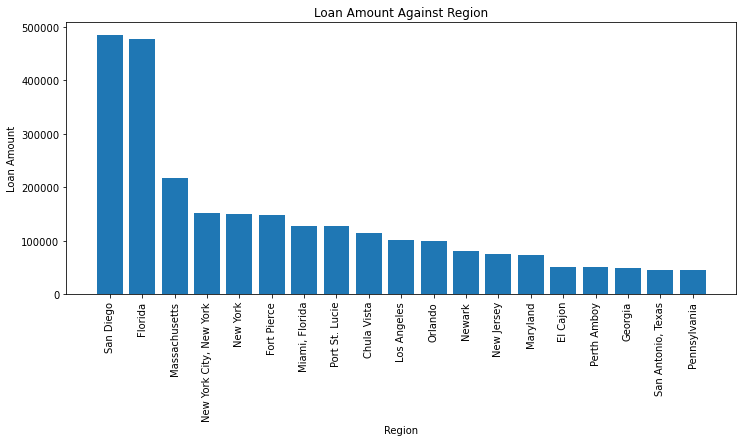

In [42]:
top_20 = top_20[top_20['region'] != 'Unknown_Region']

plt.figure(figsize=(12,5))

plt.bar(top_20['region'],top_20['loan_amount']) # plt.bar(x,height)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Against Region')

<BarContainer object of 19 artists>

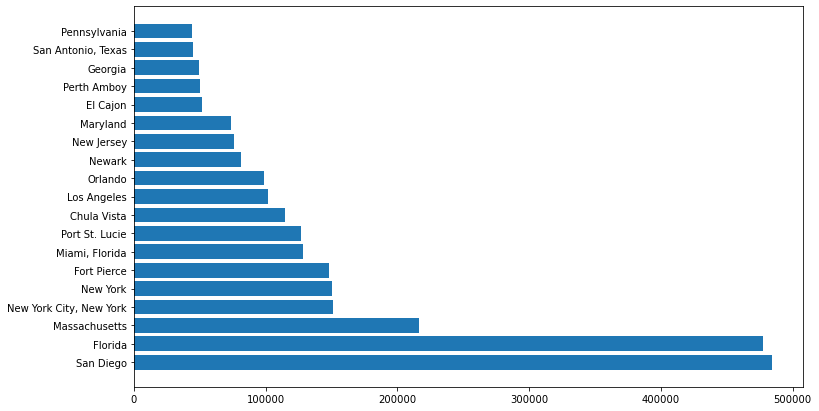

In [43]:
plt.figure(figsize=(12,7))

plt.barh(top_20['region'],top_20['loan_amount']) 

###  Scatter Plot

Text(0.5, 1.0, 'Funded Amount x Lender Count')

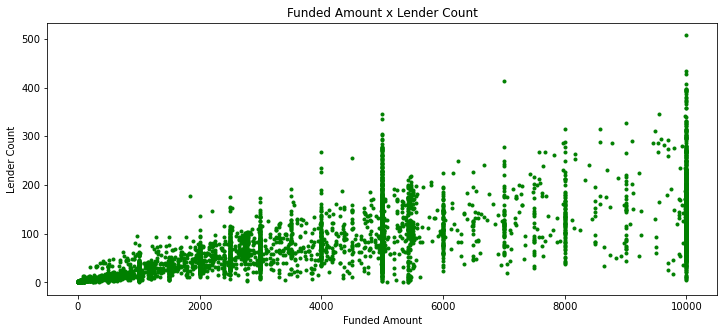

In [47]:
plt.figure(figsize=(12,5))

plt.scatter(usa['funded_amount'],usa['lender_count'],c='g',marker='.') # plt.scatter(x,y)

plt.xlabel('Funded Amount')
plt.ylabel('Lender Count')
plt.title('Funded Amount x Lender Count')

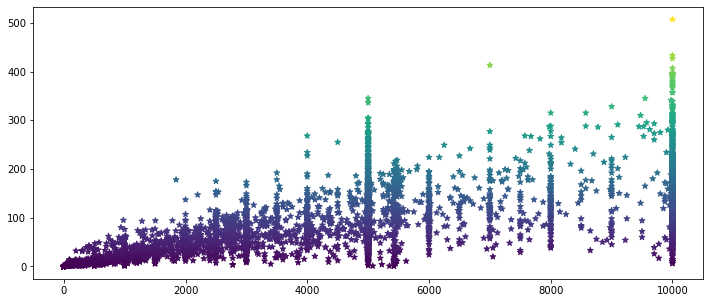

In [46]:
plt.figure(figsize=(12,5))

plt.scatter(usa['funded_amount'],usa['lender_count'], c=usa['lender_count'], marker='*') # plt.scatter(x,y)

### Histogram

(array([ 634.,  504.,  814.,  266., 1815.,  432.,  132.,  187.,   82.,
        1227.]),
 array([  125. ,  1112.5,  2100. ,  3087.5,  4075. ,  5062.5,  6050. ,
         7037.5,  8025. ,  9012.5, 10000. ]),
 <BarContainer object of 10 artists>)

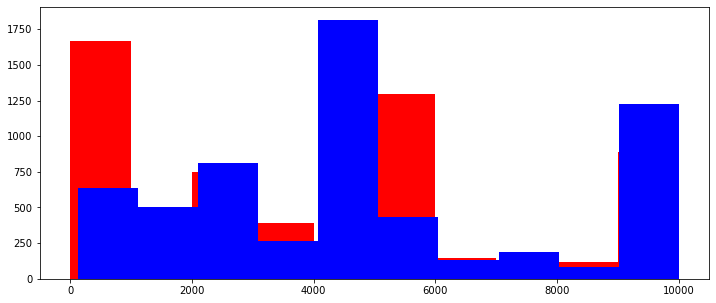

In [48]:
plt.figure(figsize=(12,5))

plt.hist(usa['funded_amount'],color='r')
plt.hist(usa['loan_amount'],color='b')

### Pie Chart

In [49]:
sector = usa.groupby('sector')['funded_amount'].sum().sort_values(ascending= False).reset_index()

sector.head()

sector  funded_amount
0     Services      6311925.0
1         Food      5850715.0
2       Retail      2999520.0
3  Agriculture      2566375.0
4     Clothing      1393120.0

In [50]:
sector['sector'].unique()

array(['Services', 'Food', 'Retail', 'Agriculture', 'Clothing', 'Arts',
       'Education', 'Personal Use', 'Transportation', 'Entertainment',
       'Health', 'Construction', 'Housing', 'Manufacturing', 'Wholesale'],
      dtype=object)

In [51]:
sector['sector'].nunique()

15

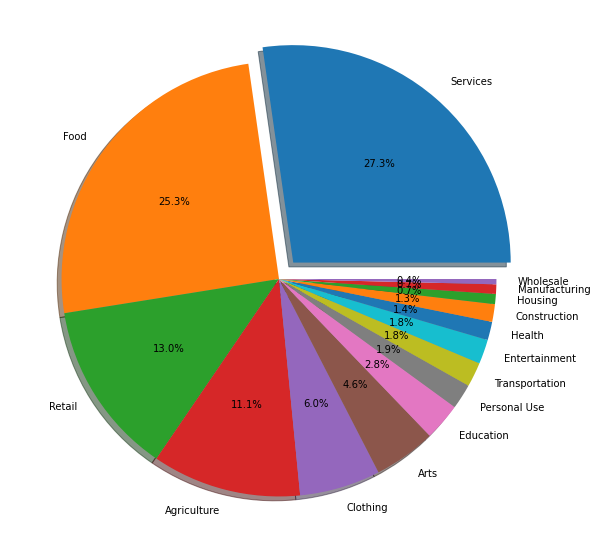

In [54]:
explode = (0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0)  # only "explode" the 1st slice (i.e. 'Service')

plt.figure(figsize=(10,10))

plt.pie(sector['funded_amount'],labels=sector['sector'], explode = explode,shadow=True,autopct='%1.1f%%')

plt.show()

### Line Plot

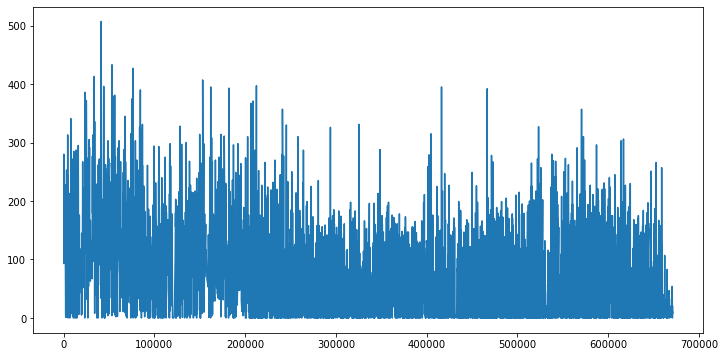

In [55]:
plt.figure(figsize=(12,6))

plt.plot(usa['lender_count'])

### Matplotlib Subplots

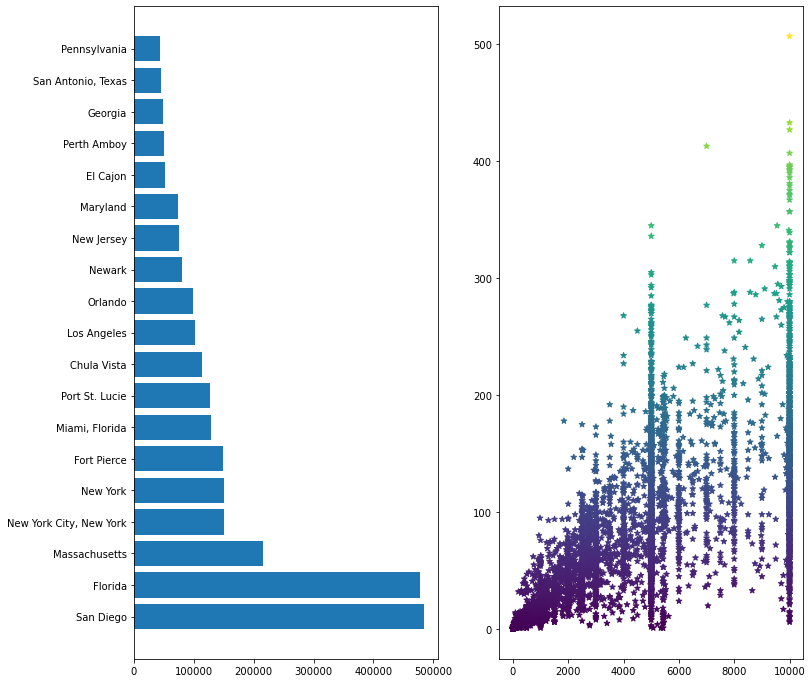

In [56]:
plt.figure(figsize=(12,12))

plt.subplot(1,2,1) # plt.subplot(nrows, ncols, plot_number)

plt.barh(top_20['region'],top_20['loan_amount']) # plt.bar(x,height)

plt.subplot(1,2,2)

plt.scatter(usa['funded_amount'],usa['lender_count'],c=usa['lender_count'],marker='*')  # plt.scatter(x,y)

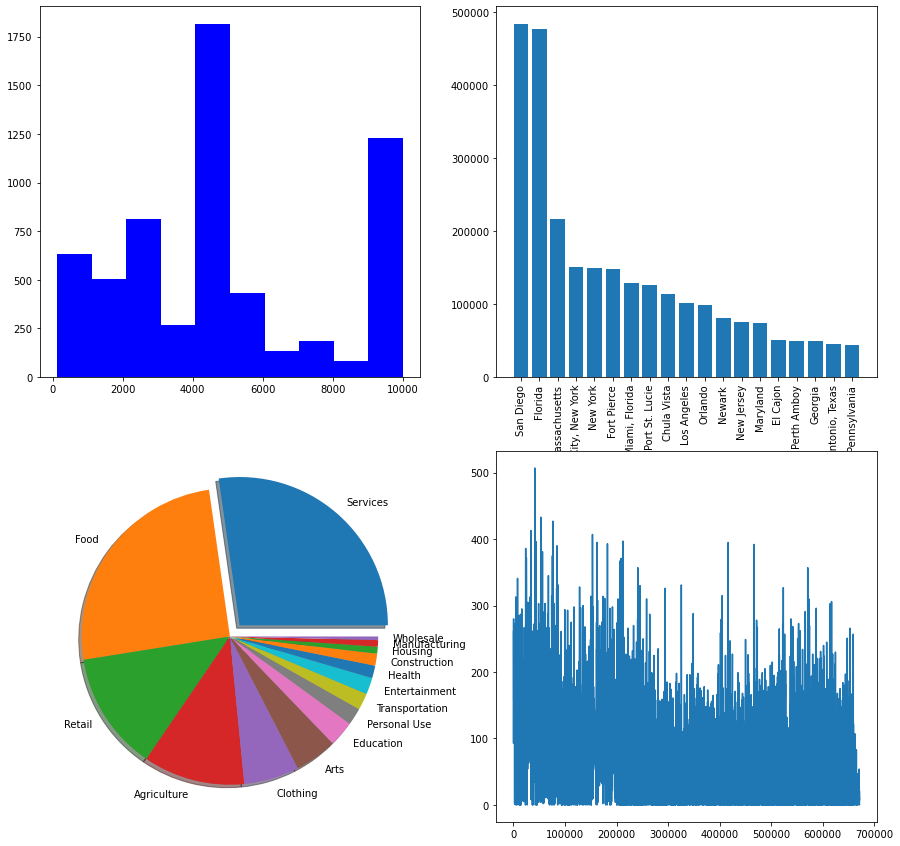

In [57]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)  # plt.subplot(nrows, ncols, plot_number)
plt.hist(usa['loan_amount'],color='b')

plt.subplot(2,2,2)
plt.xticks(rotation=90) # Get or set the current tick locations and labels of the x-axis
plt.bar(top_20['region'],top_20['loan_amount']) # plt.bar(x,height)

plt.subplot(2,2,3)
plt.pie(sector['funded_amount'],labels=sector['sector'],explode = explode,shadow=True)

plt.subplot(2,2,4)
plt.plot(usa['lender_count'])

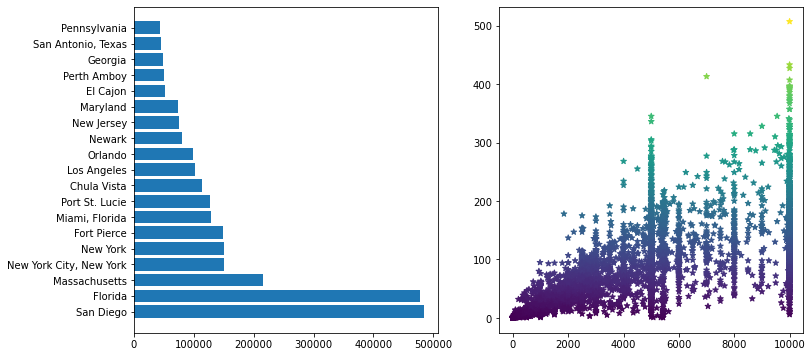

In [58]:
#Creates two subplots and unpack them. Create a figure and a set of subplots.

fig, ax = plt.subplots(1,2, figsize = (12,6)) # ax is a matplotlib axes

ax[0].barh(top_20['region'],top_20['loan_amount']) # plt.bar(x,height)

ax[1].scatter(usa['funded_amount'],usa['lender_count'], c=usa['lender_count'],marker='*') # plt.scatter(x,y)

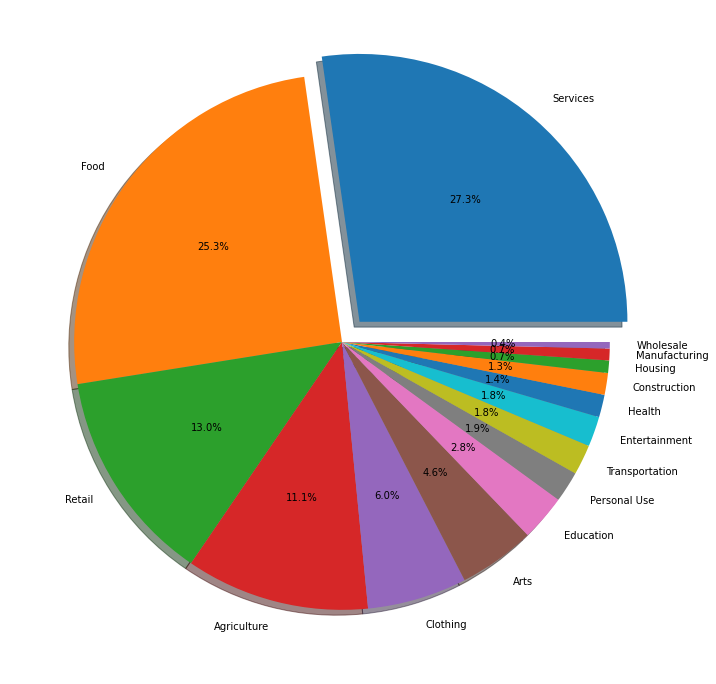

In [59]:
fig1, ax1 = plt.subplots(figsize = (12,15))

ax1.pie(sector['funded_amount'],labels=sector['sector'],explode = explode,shadow=True,autopct='%1.1f%%')

plt.show()

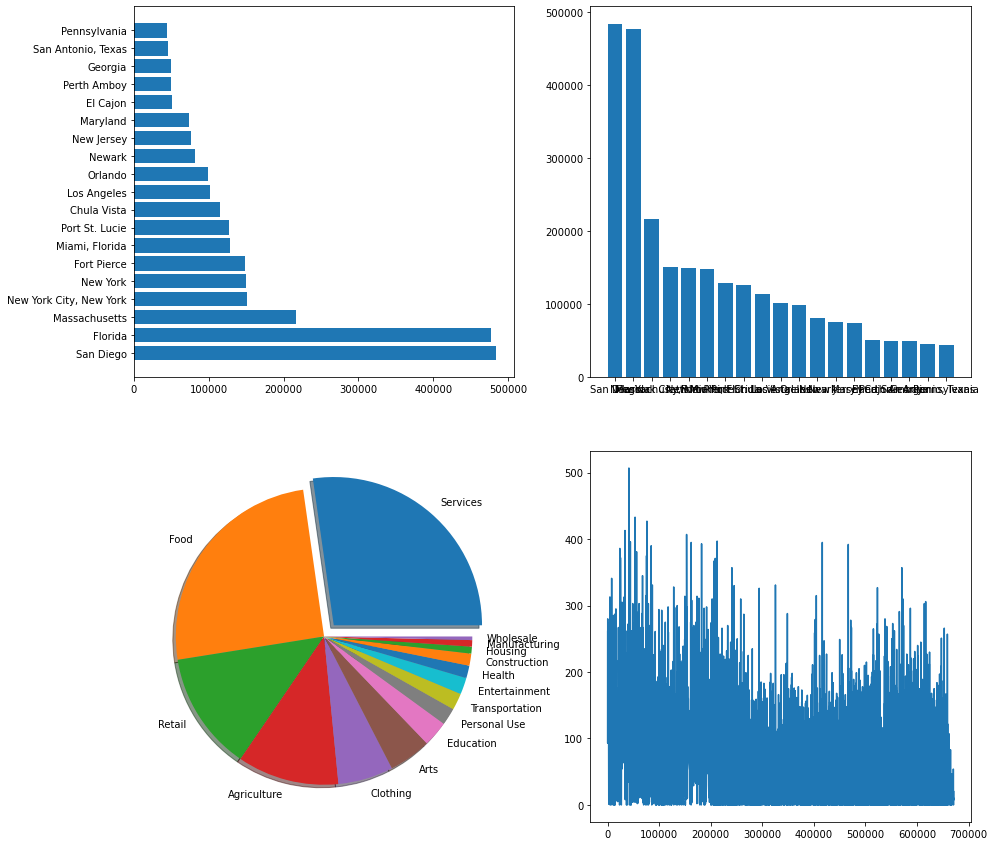

In [60]:
fig2, ax2 = plt.subplots(2,2,figsize = (15,15))

ax2[0,0].barh(top_20['region'],top_20['loan_amount']) # plt.bar(x,height)

ax2[0,1].bar(top_20['region'],top_20['loan_amount']) # plt.bar(x,height)

ax2[1,0].pie(sector['funded_amount'],labels=sector['sector'],explode = explode,shadow=True)

ax2[1,1].plot(usa['lender_count'])

### Categorical Plots

<AxesSubplot:title={'center':'Sector Countplot'}, xlabel='sector', ylabel='count'>

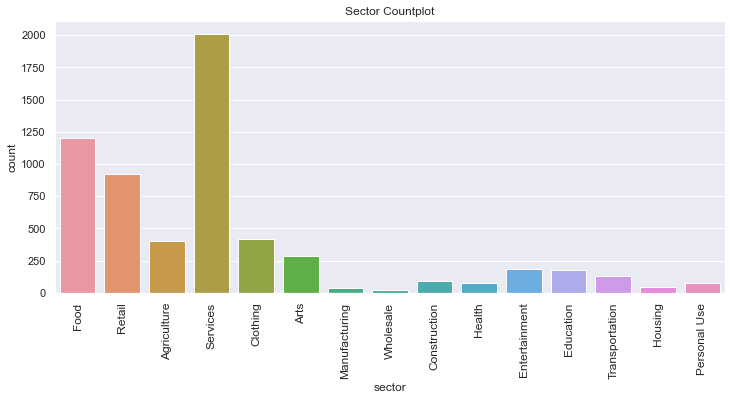

In [62]:
plt.figure(figsize=(12,5))          # Create a new figure

plt.title('Sector Countplot')
plt.xticks(rotation=90, fontsize=12)

sns.countplot(x='sector',data=usa)  # Show the counts of observations in each categorical bin using bars.

### Violin Plot

<AxesSubplot:title={'center':'Sector VS Funded Amount Violinplot'}, xlabel='sector', ylabel='funded_amount'>

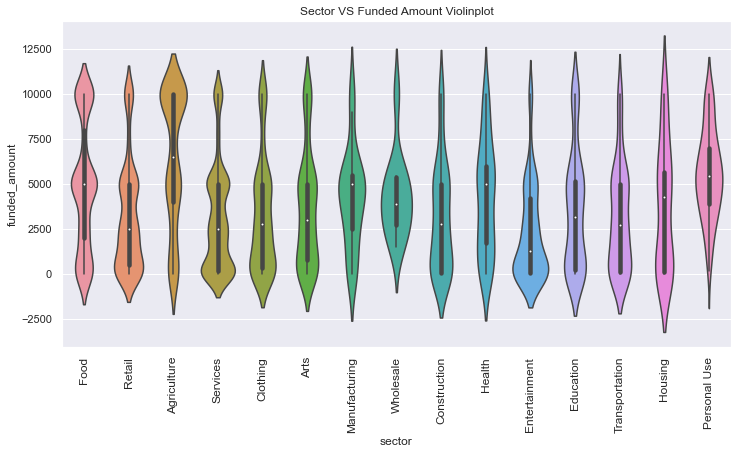

In [66]:
plt.figure(figsize=(12,6))         # Create a new figure

plt.title('Sector VS Funded Amount Violinplot')
plt.xticks(rotation=90, fontsize=12)

sns.violinplot(x='sector', y='funded_amount', data=usa)

<AxesSubplot:xlabel='sector', ylabel='lender_count'>

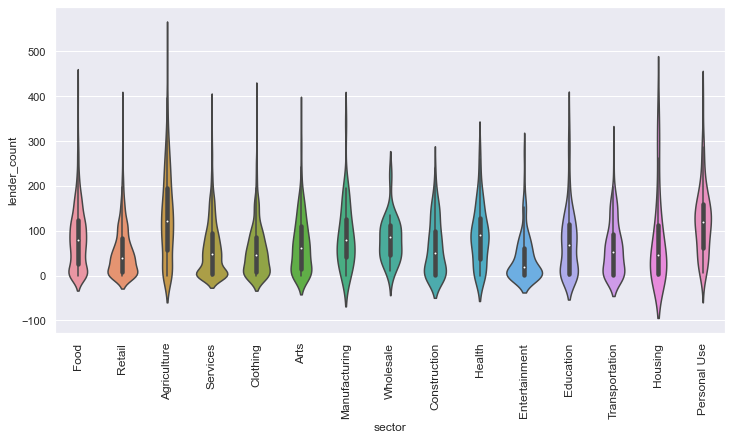

In [67]:
plt.figure(figsize=(12,6))         # Create a new figure

plt.xticks(rotation=90, fontsize=12)

sns.violinplot(x='sector', y='lender_count',data=usa)

### Swarm Plot

C:\Users\Jack\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jack\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jack\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jack\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jack\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.5% of the points cann

<AxesSubplot:title={'center':'Sector VS Lender Count Swarmplot'}, xlabel='sector', ylabel='lender_count'>

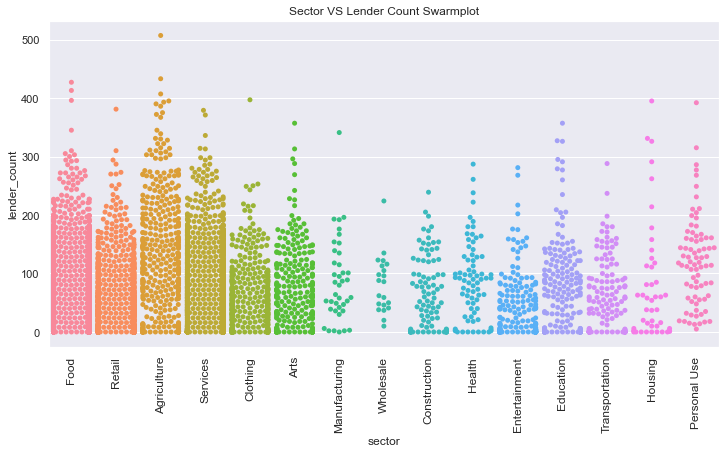

In [69]:
plt.figure(figsize=(12,6))         # Create a new figure

plt.xticks(rotation=90,fontsize=12)
plt.title('Sector VS Lender Count Swarmplot')

sns.swarmplot(x='sector',y='lender_count',data=usa)

### Strip plot

<AxesSubplot:xlabel='sector', ylabel='lender_count'>

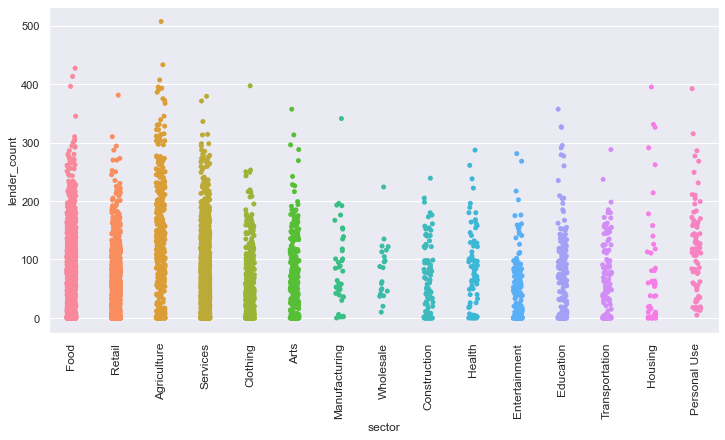

In [70]:
plt.figure(figsize=(12,6))          # Create a new figure

plt.xticks(rotation=90,fontsize=12)

sns.stripplot(x='sector', y='lender_count', data=usa) # another type of a scatterplot

### Adding Hue

<AxesSubplot:title={'center':'Sector VS Lender Count Swarmplot'}, xlabel='sector', ylabel='lender_count'>

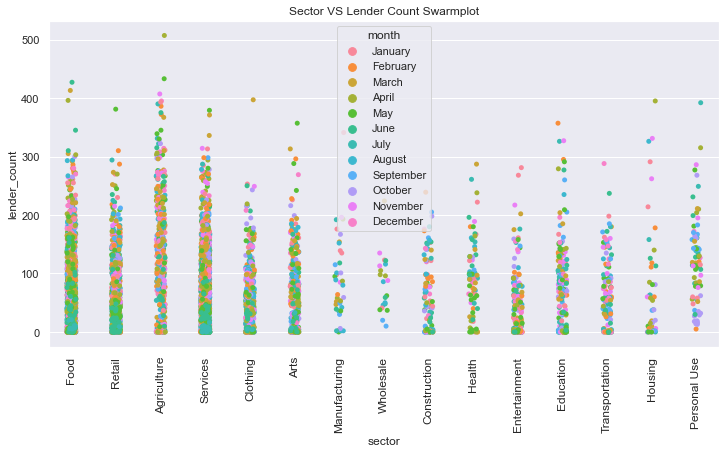

In [80]:
# Hue for showing more than one relationship

plt.figure(figsize=(12,6))       # Create a new figure

plt.xticks(rotation=90,fontsize=12)
plt.title('Sector VS Lender Count Swarmplot')

sns.stripplot(x='sector', y='lender_count', hue='month', data=usa)

### Box Plot

<AxesSubplot:xlabel='sector', ylabel='funded_amount'>

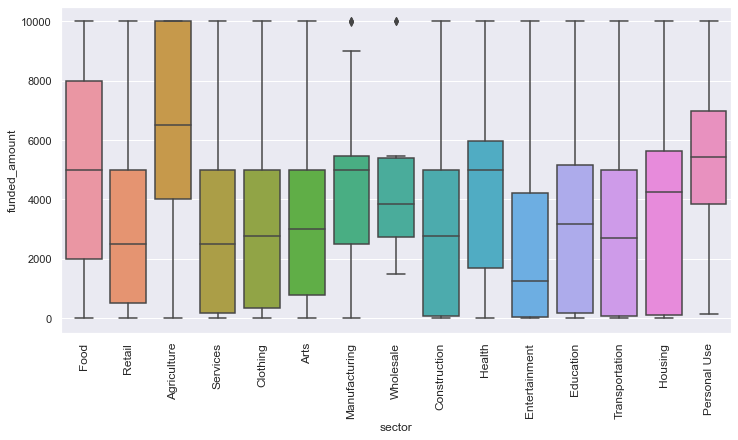

In [81]:
# Distribution of funded amount within sectors

plt.figure(figsize=(12,6)) 

plt.xticks(rotation=90,fontsize=12)

sns.boxplot(x="sector", y="funded_amount", data=usa)

### Boxen Plot

<AxesSubplot:xlabel='sector', ylabel='funded_amount'>

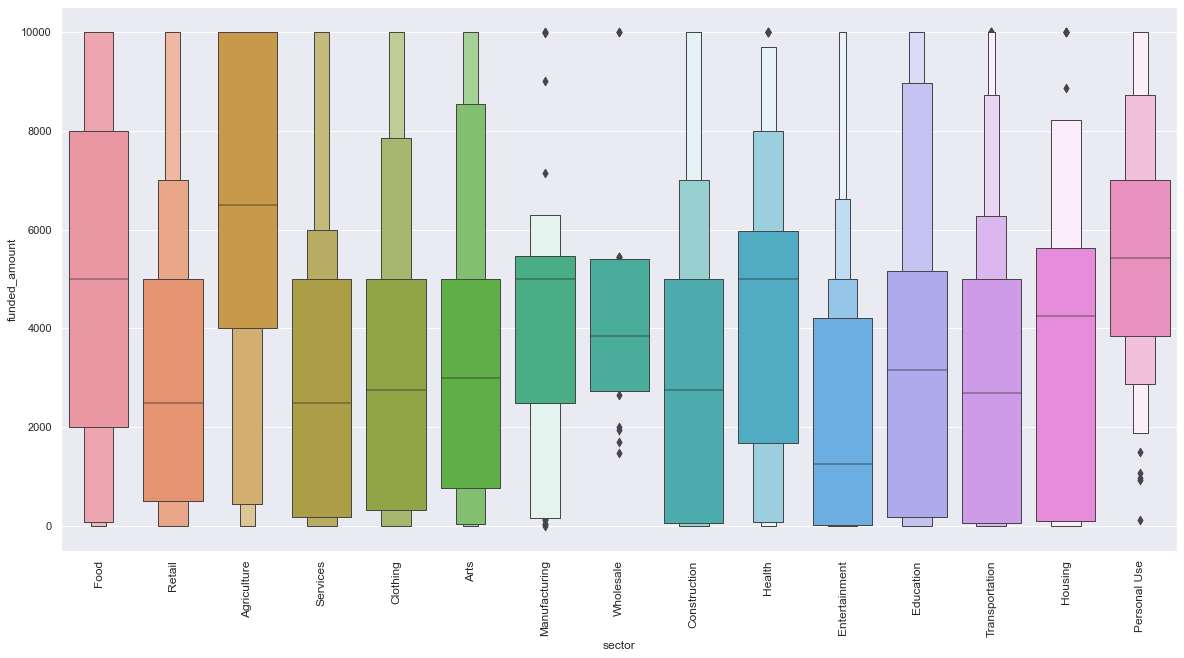

In [82]:
# Distribution of funded amount within sectors

plt.figure(figsize=(20,10)) 

plt.xticks(rotation=90,fontsize=12)

sns.boxenplot(x="sector", y="funded_amount", data=usa)

### Bar Plot

Text(0.5, 1.0, 'Loan Amount Against Region')

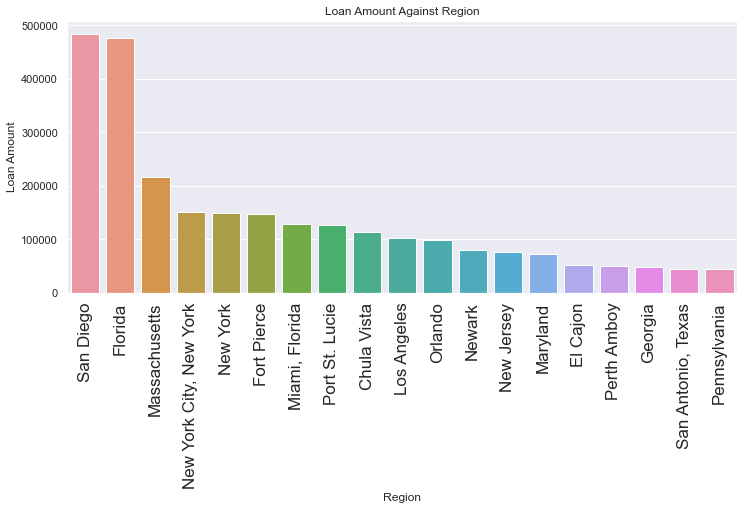

In [83]:
plt.figure(figsize=(12,5)) 

plt.xticks(rotation=90,fontsize=17)

sns.barplot(x='region',y='loan_amount', data=top_20)

plt.xlabel('Region')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Against Region')

<AxesSubplot:xlabel='loan_amount', ylabel='region'>

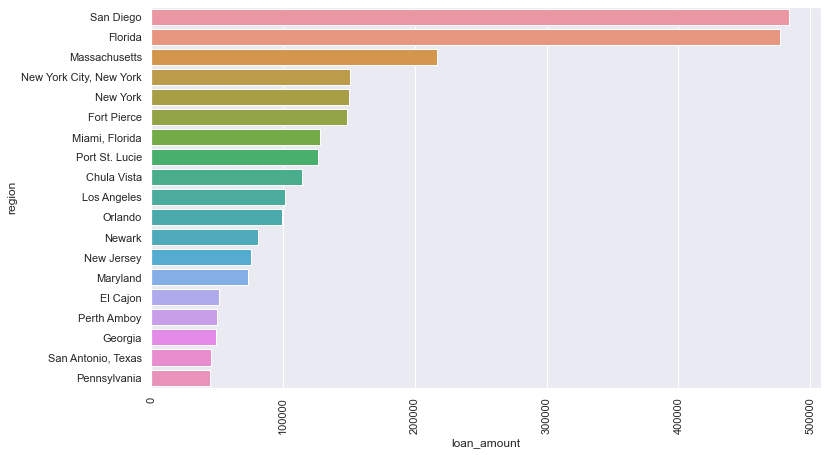

In [84]:
plt.figure(figsize=(12,7)) 

plt.xticks(rotation=90) 
                        
sns.barplot(y='region',x='loan_amount', data=top_20)

### Visualizing Distributions

<AxesSubplot:xlabel='funded_amount', ylabel='lender_count'>

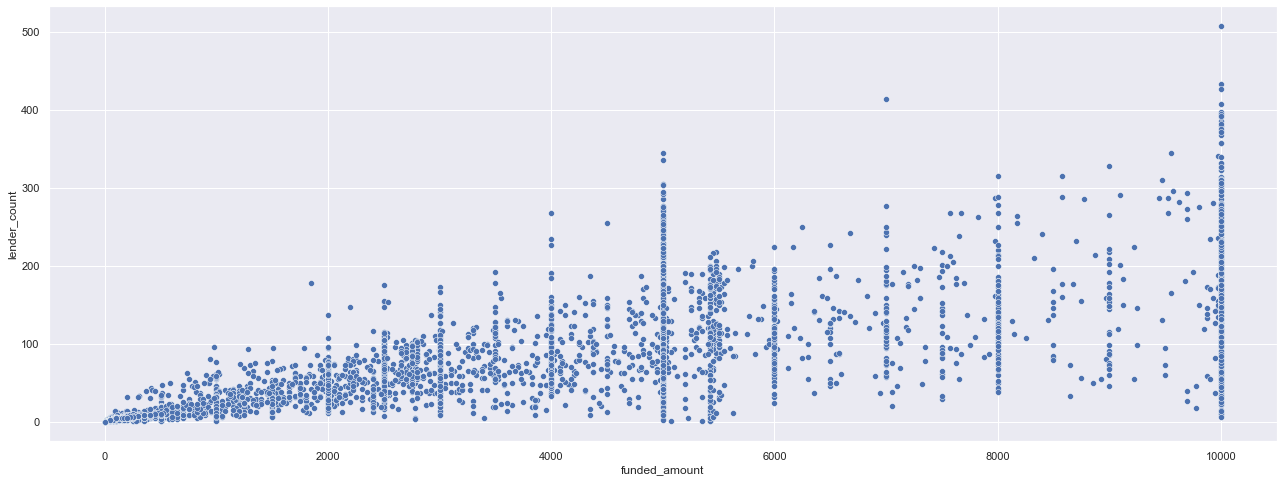

In [85]:
plt.figure(figsize=(22,8))

sns.scatterplot(x='funded_amount',y='lender_count',data=usa)

<AxesSubplot:xlabel='funded_amount', ylabel='lender_count'>

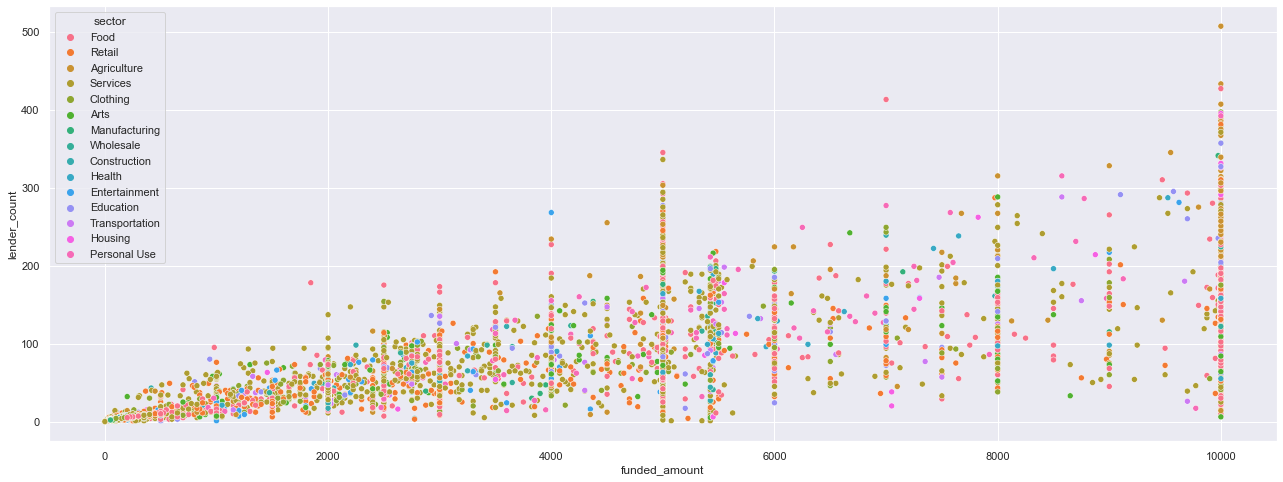

In [86]:
plt.figure(figsize=(22,8))

sns.scatterplot(x='funded_amount',y='lender_count',hue='sector',data=usa)

# hue : name of variables in ``data`` 
#     Grouping variable that will produce points with different colors.
#     Can be either categorical or numeric, although color mapping will
#     behave differently in latter case.

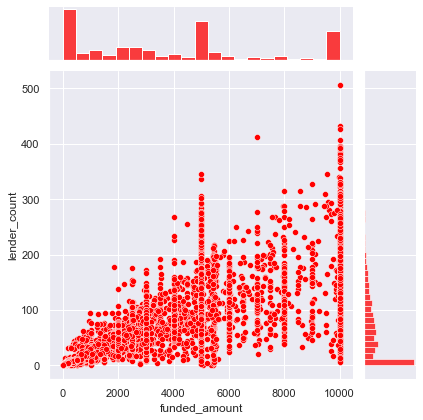

In [87]:
sns.jointplot(x='funded_amount',y='lender_count',color='red',data=usa)

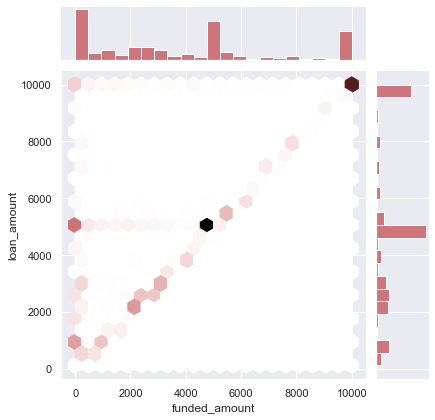

In [88]:
sns.jointplot(x='funded_amount',y='loan_amount',kind='hex',color='r',data=usa)

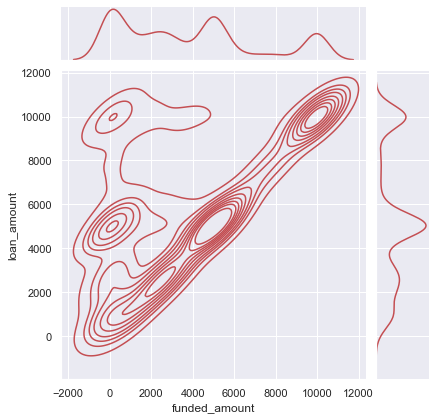

In [89]:
sns.jointplot(x='funded_amount',y='loan_amount',kind='kde',color='r', data=usa)

<AxesSubplot:xlabel='funded_amount', ylabel='Count'>

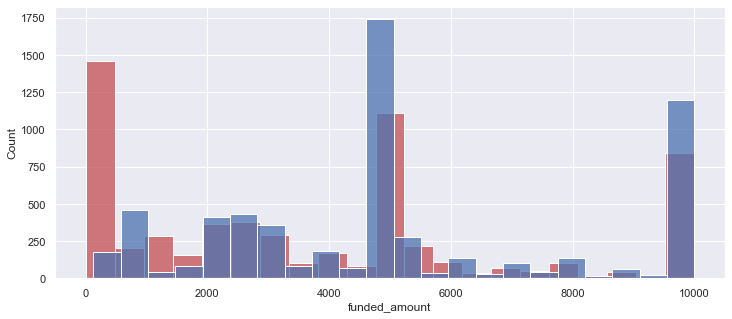

In [94]:
plt.figure(figsize=(12,5))

sns.histplot(usa['funded_amount'],color='r')
sns.histplot(usa['loan_amount'],color='b')

### Pairplot

<Figure size 864x360 with 0 Axes>

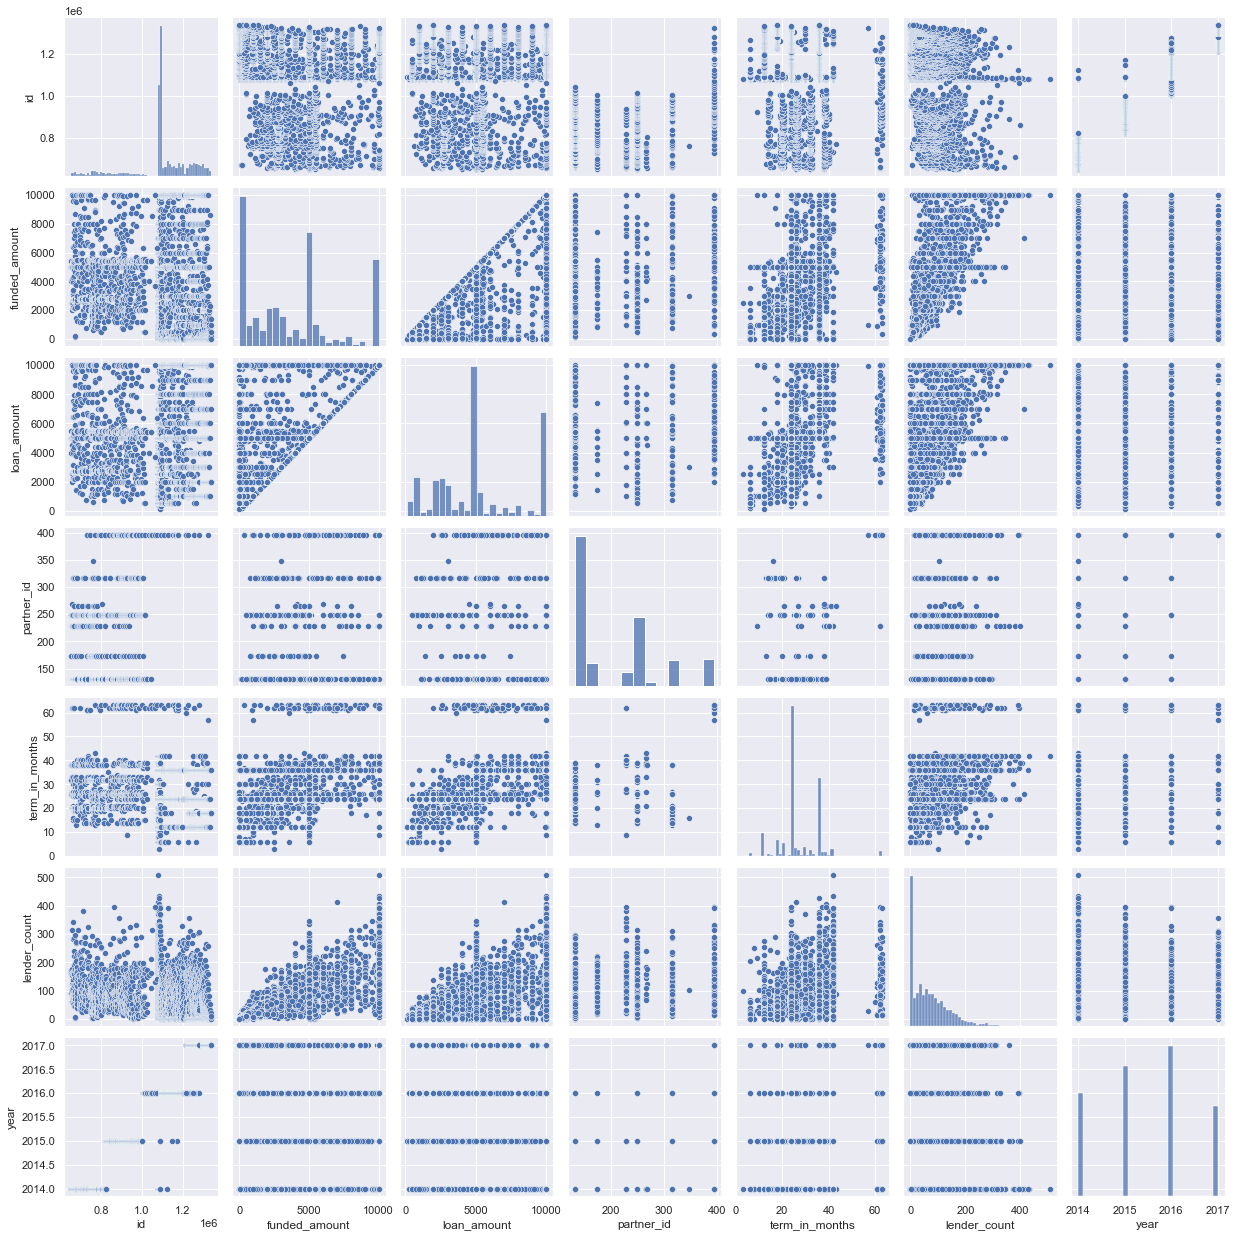

In [100]:
plt.figure(figsize=(12,5))

sns.pairplot(usa)

<Figure size 864x360 with 0 Axes>

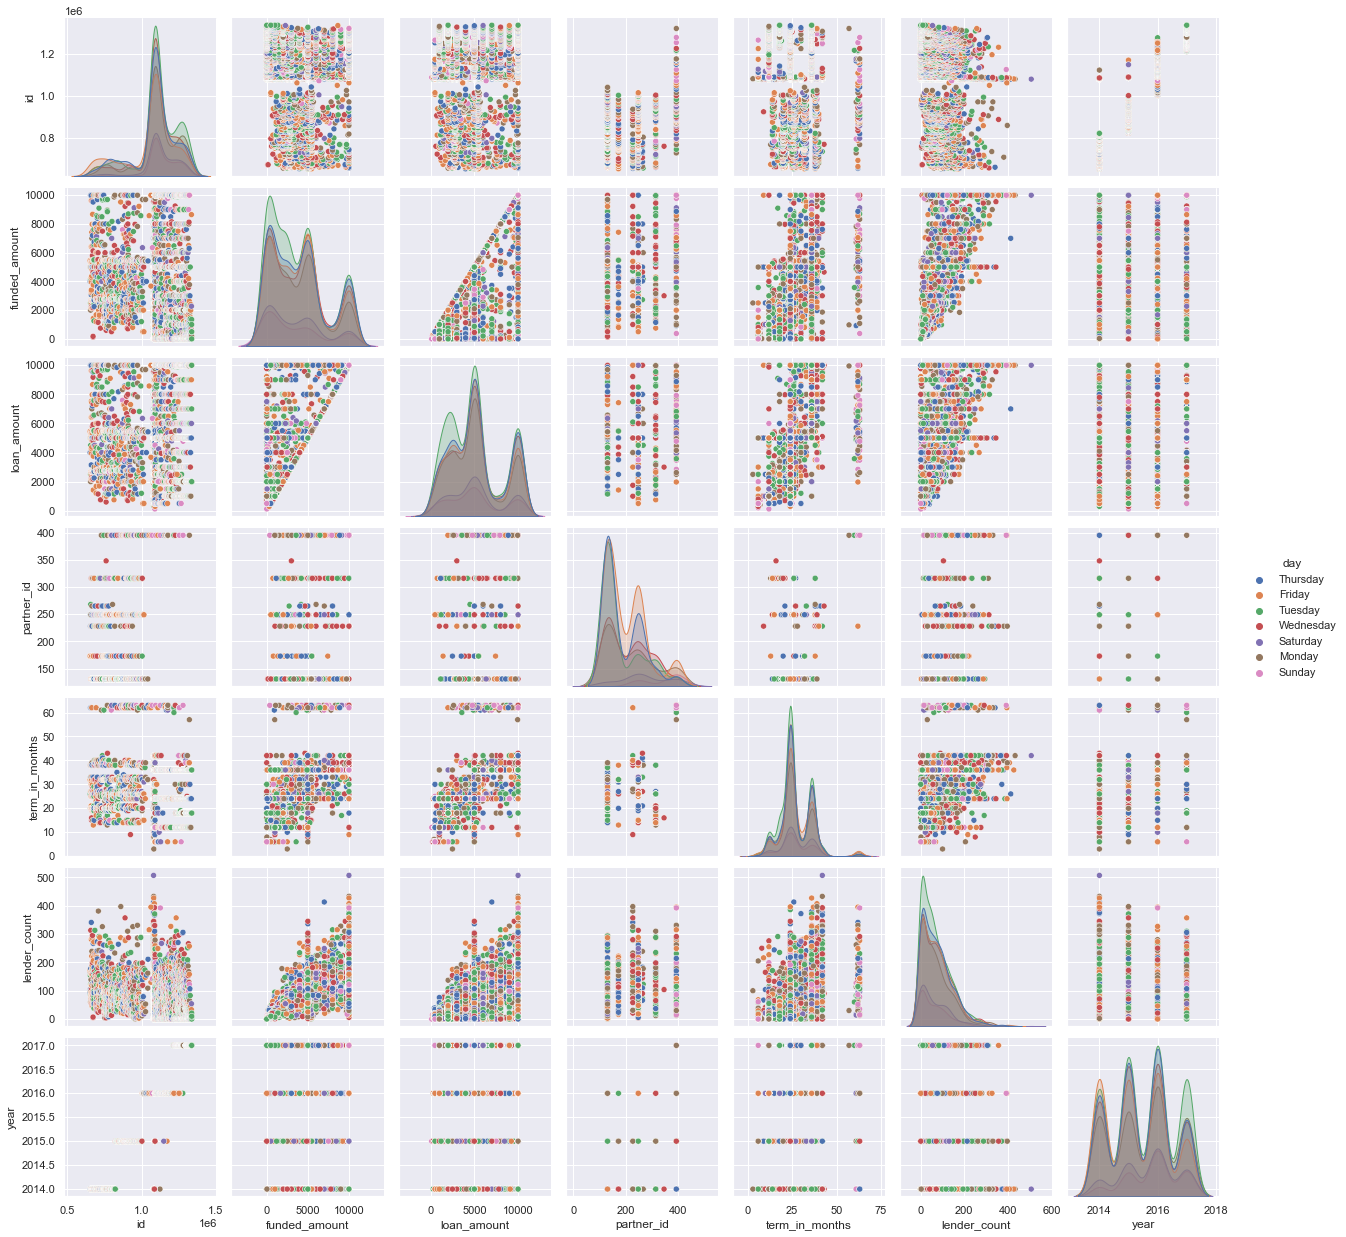

In [101]:
plt.figure(figsize=(12,5))

sns.pairplot(usa, hue="day")

### Line Plot

<AxesSubplot:xlabel='funded_amount', ylabel='lender_count'>

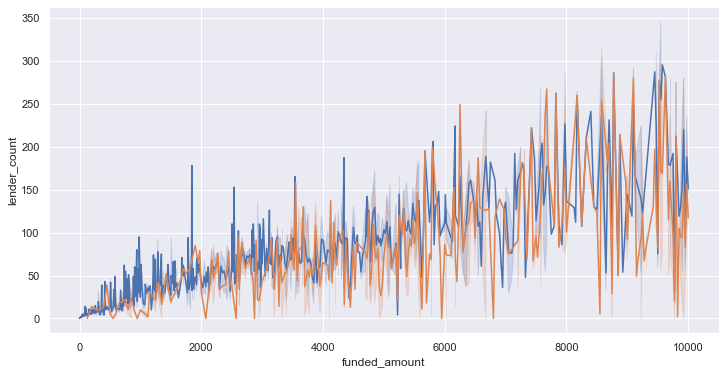

In [102]:
plt.figure(figsize=(12,6))

sns.lineplot(x='funded_amount',y='lender_count',data=usa)
sns.lineplot(x='loan_amount',y='lender_count',data=usa)

## Matplotlib Subplots with Seaborn Section

<AxesSubplot:xlabel='funded_amount', ylabel='lender_count'>

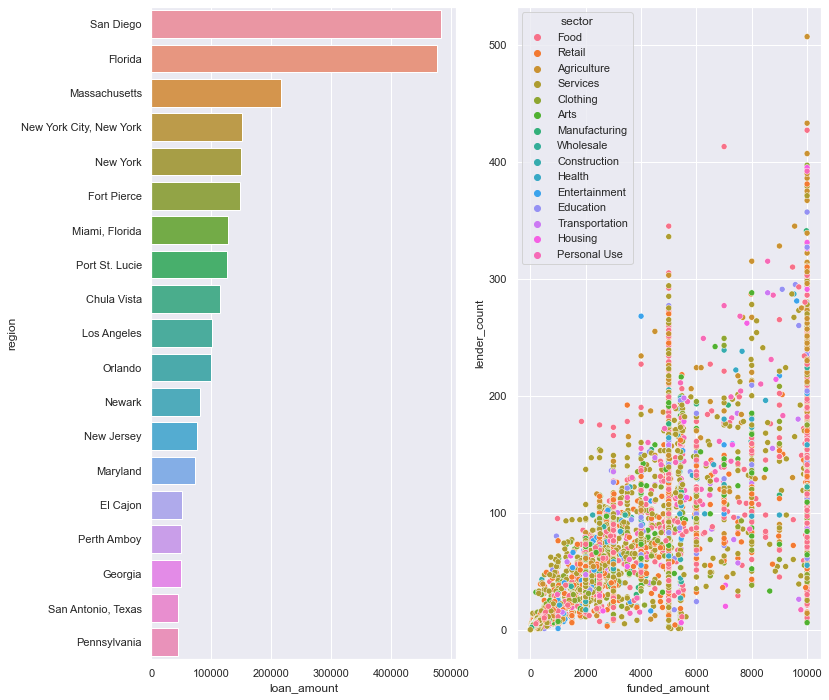

In [103]:
# plt.subplot(nrows, ncols, plot_number)

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
sns.barplot(y='region',x='loan_amount', data=top_20)

plt.subplot(1,2,2)
sns.scatterplot(x='funded_amount',y='lender_count',hue='sector',data=usa)

<AxesSubplot:xlabel='loan_amount', ylabel='lender_count'>

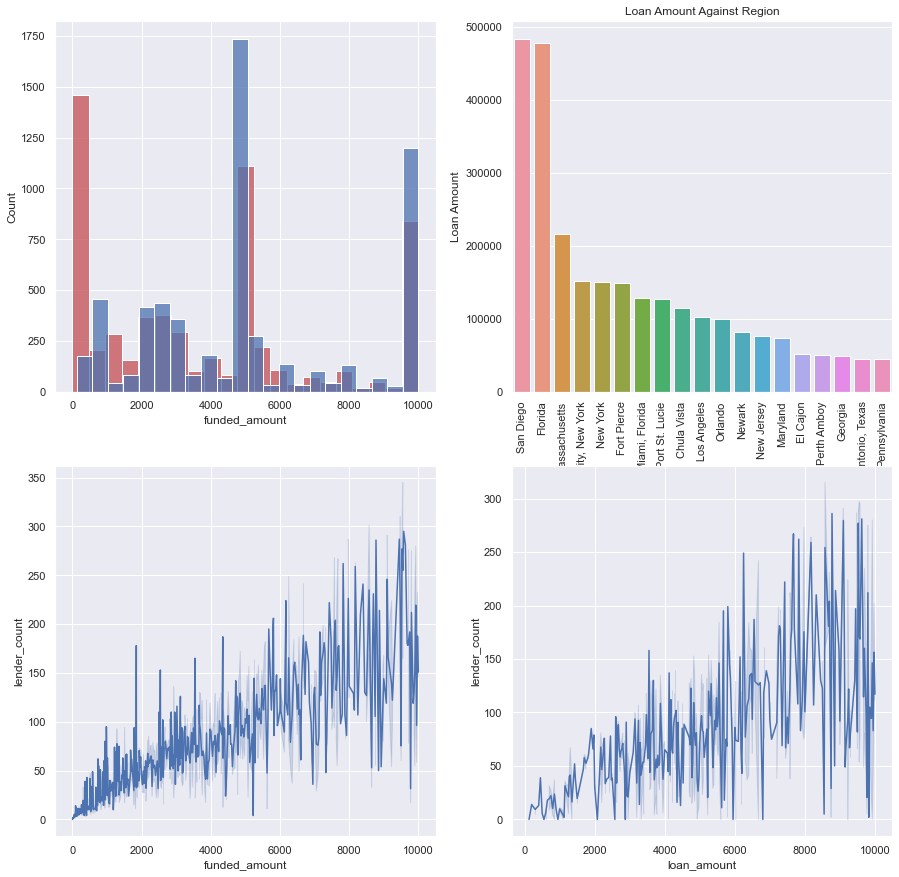

In [105]:
# plt.subplot(nrows, ncols, plot_number)

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(usa['funded_amount'],color='r')
sns.histplot(usa['loan_amount'],color='b')

plt.subplot(2,2,2)
plt.xticks(rotation=90) # Get or set the current tick locations and labels of the x-axis
sns.barplot(x='region',y='loan_amount', data=top_20)
plt.xlabel('Region')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Against Region')

plt.subplot(2,2,3)
sns.lineplot(x='funded_amount',y='lender_count',data=usa)

plt.subplot(2,2,4)
sns.lineplot(x='loan_amount',y='lender_count',data=usa)

<AxesSubplot:xlabel='funded_amount', ylabel='lender_count'>

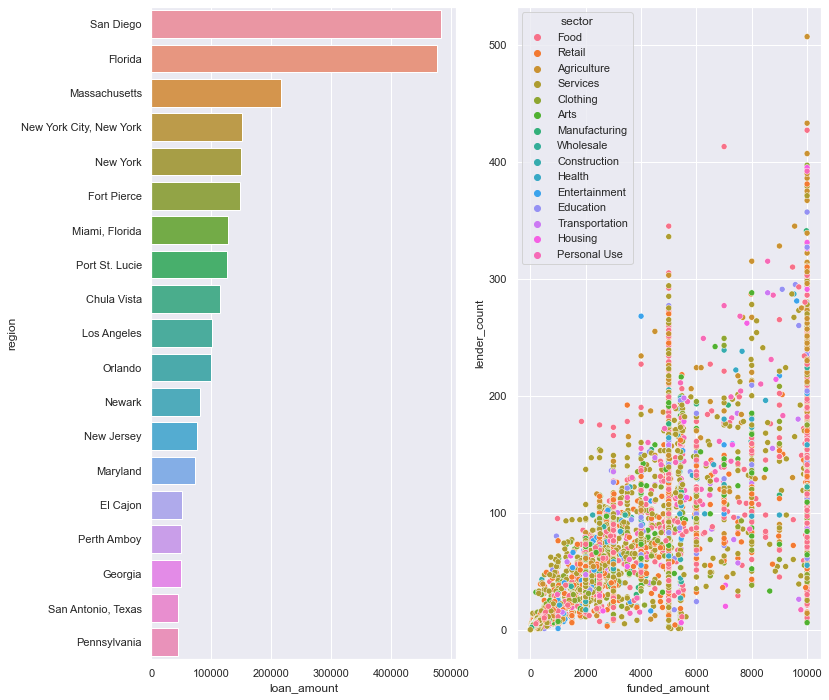

In [106]:
# plt.subplot(nrows, ncols, plot_number)

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
sns.barplot(y='region',x='loan_amount', data=top_20)

plt.subplot(1,2,2)
sns.scatterplot(x='funded_amount',y='lender_count',hue='sector',data=usa)

<AxesSubplot:xlabel='funded_amount', ylabel='lender_count'>

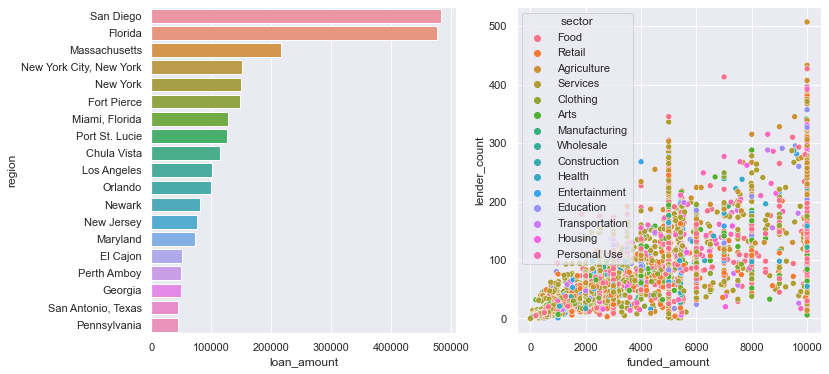

In [107]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.barplot(y='region',x='loan_amount', data=top_20, ax=ax[0])
sns.scatterplot(x='funded_amount',y='lender_count',hue='sector',data=usa,ax=ax[1])

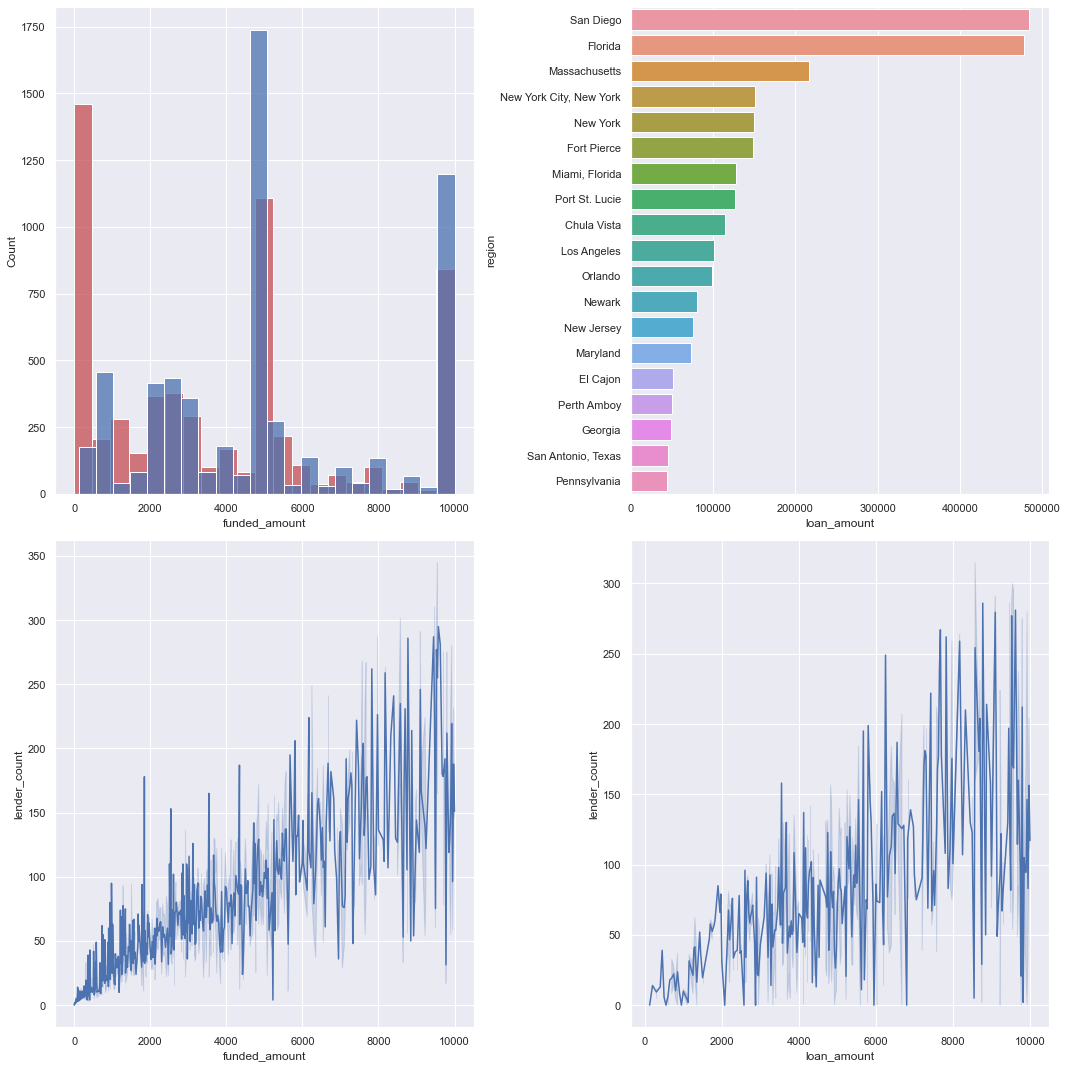

In [109]:
# plt.subplot(nrows, ncols, plot_number)

fig1, ax1 = plt.subplots(2,2, figsize = (15,15))

sns.histplot(usa['funded_amount'],color='r',ax=ax1[0,0])
sns.histplot(usa['loan_amount'],color='b',ax=ax1[0,0])

sns.barplot(y='region',x='loan_amount', data=top_20,ax=ax1[0,1])

sns.lineplot(x='funded_amount',y='lender_count',data=usa,ax=ax1[1,0])

sns.lineplot(x='loan_amount',y='lender_count',data=usa,ax=ax1[1,1])

plt.tight_layout()

### Matrix Visualization

In [110]:
corr = usa.corr()
corr

id  funded_amount  loan_amount  partner_id  \
id              1.000000      -0.108620    -0.005849    0.400365   
funded_amount  -0.108620       1.000000     0.703399    0.195330   
loan_amount    -0.005849       0.703399     1.000000    0.213743   
partner_id      0.400365       0.195330     0.213743    1.000000   
term_in_months -0.071542       0.544649     0.710786    0.645826   
lender_count   -0.220667       0.752785     0.479729    0.217364   
year            0.753130      -0.076514     0.011789    0.345954   

                term_in_months  lender_count      year  
id                   -0.071542     -0.220667  0.753130  
funded_amount         0.544649      0.752785 -0.076514  
loan_amount           0.710786      0.479729  0.011789  
partner_id            0.645826      0.217364  0.345954  
term_in_months        1.000000      0.412119  0.008457  
lender_count          0.412119      1.000000 -0.261958  
year                  0.008457     -0.261958  1.000000

In [112]:
corr.drop(['id','partner_id'], axis=0,inplace=True)
corr.drop(['id','partner_id'], axis=1,inplace=True)
corr

funded_amount  loan_amount  term_in_months  lender_count  \
funded_amount        1.000000     0.703399        0.544649      0.752785   
loan_amount          0.703399     1.000000        0.710786      0.479729   
term_in_months       0.544649     0.710786        1.000000      0.412119   
lender_count         0.752785     0.479729        0.412119      1.000000   
year                -0.076514     0.011789        0.008457     -0.261958   

                    year  
funded_amount  -0.076514  
loan_amount     0.011789  
term_in_months  0.008457  
lender_count   -0.261958  
year            1.000000

<AxesSubplot:>

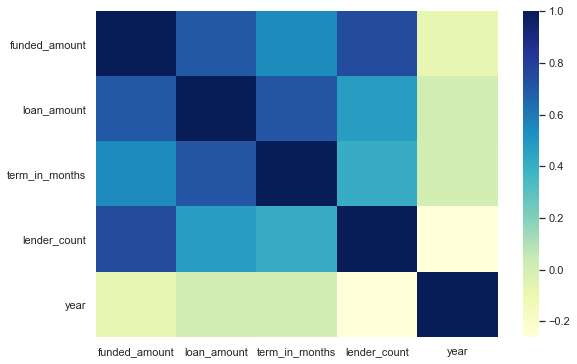

In [116]:
plt.figure(figsize=(9,6))
sns.heatmap(corr, cmap="YlGnBu")

<AxesSubplot:>

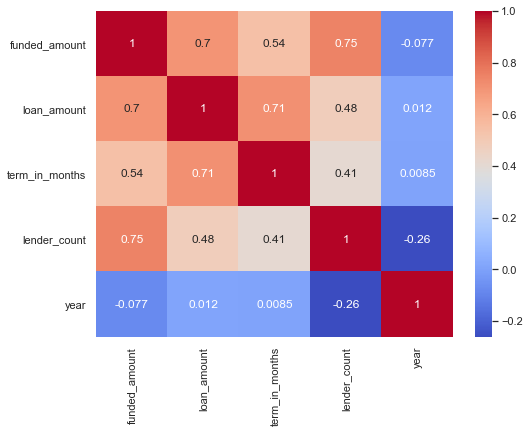

In [117]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", annot=True)

### Visualize Linear Relationships

<AxesSubplot:title={'center':'Funded Amount and Lender Count Regression Plot'}, xlabel='funded_amount', ylabel='lender_count'>

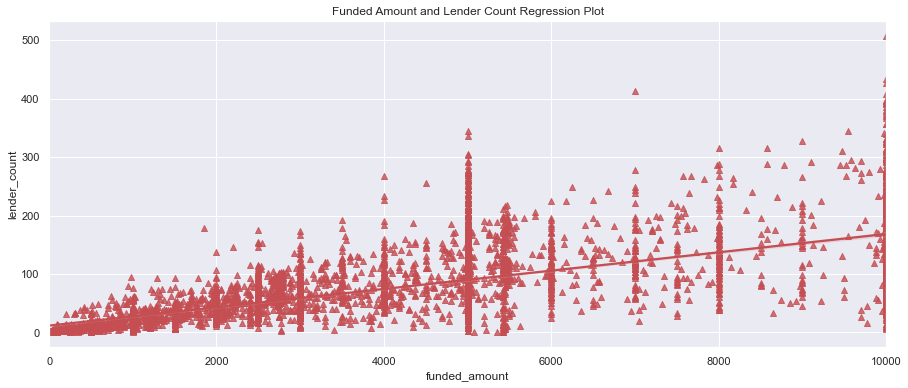

In [118]:
# Fits a linear regression line and plots the resulting line

plt.figure(figsize=(15,6))

plt.title('Funded Amount and Lender Count Regression Plot')
plt.xlabel('Funded Amount')
plt.ylabel('Lender Count')

sns.regplot(x="funded_amount", y="lender_count", data=usa, marker='^',color='r')

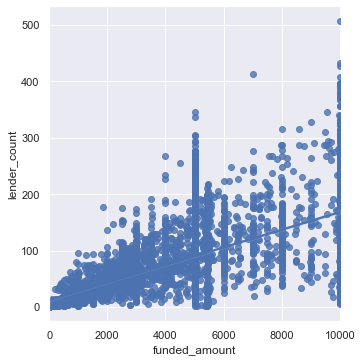

In [119]:
# Fits a regression line and plots the resulting line

sns.lmplot(x="funded_amount", y="lender_count", data=usa)

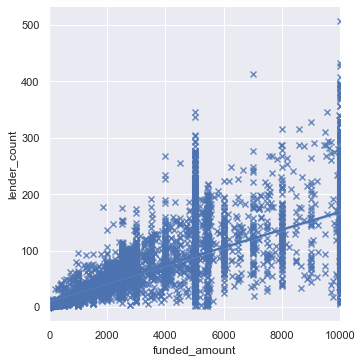

In [120]:
# Fits a regression line and plots the resulting line

sns.lmplot(x="funded_amount", markers=["x"],y="lender_count",data=usa)

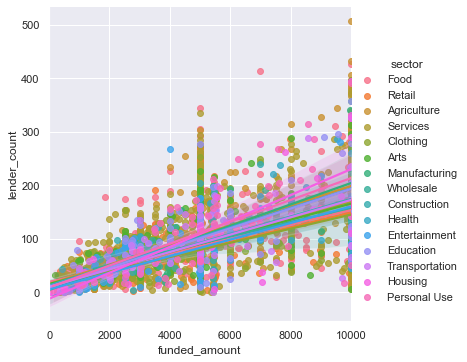

In [121]:
# Fits a regression line and plots the resulting line

sns.lmplot(x="funded_amount", y="lender_count",hue='sector',data=usa)

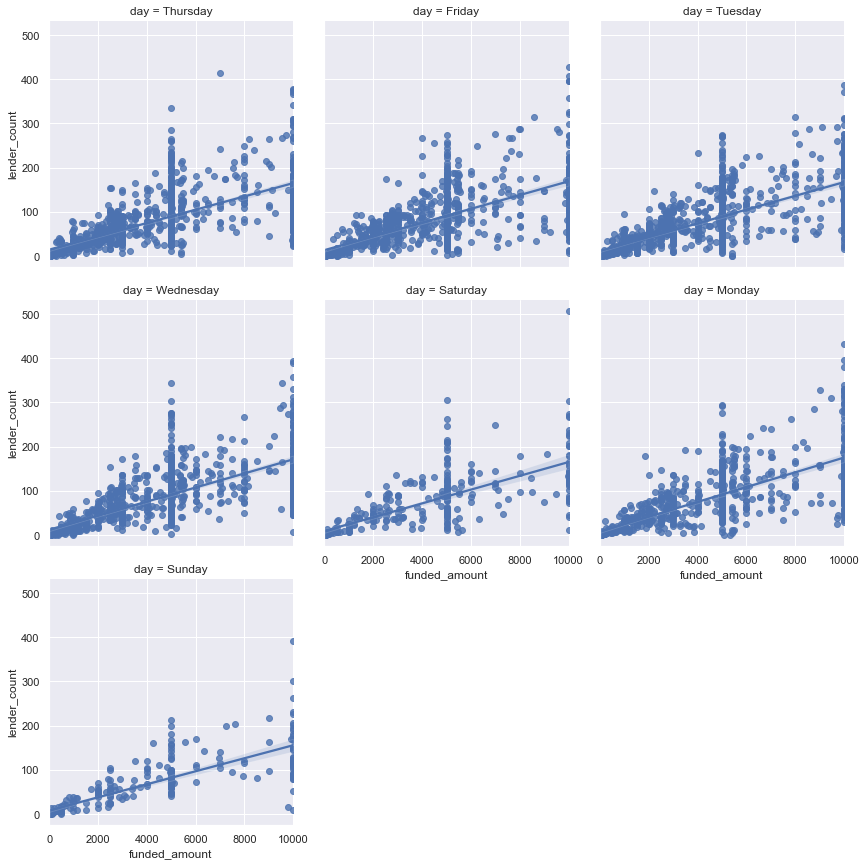

In [122]:
sns.lmplot(x="funded_amount", y="lender_count", col="day", data=usa,col_wrap=3, height=4)

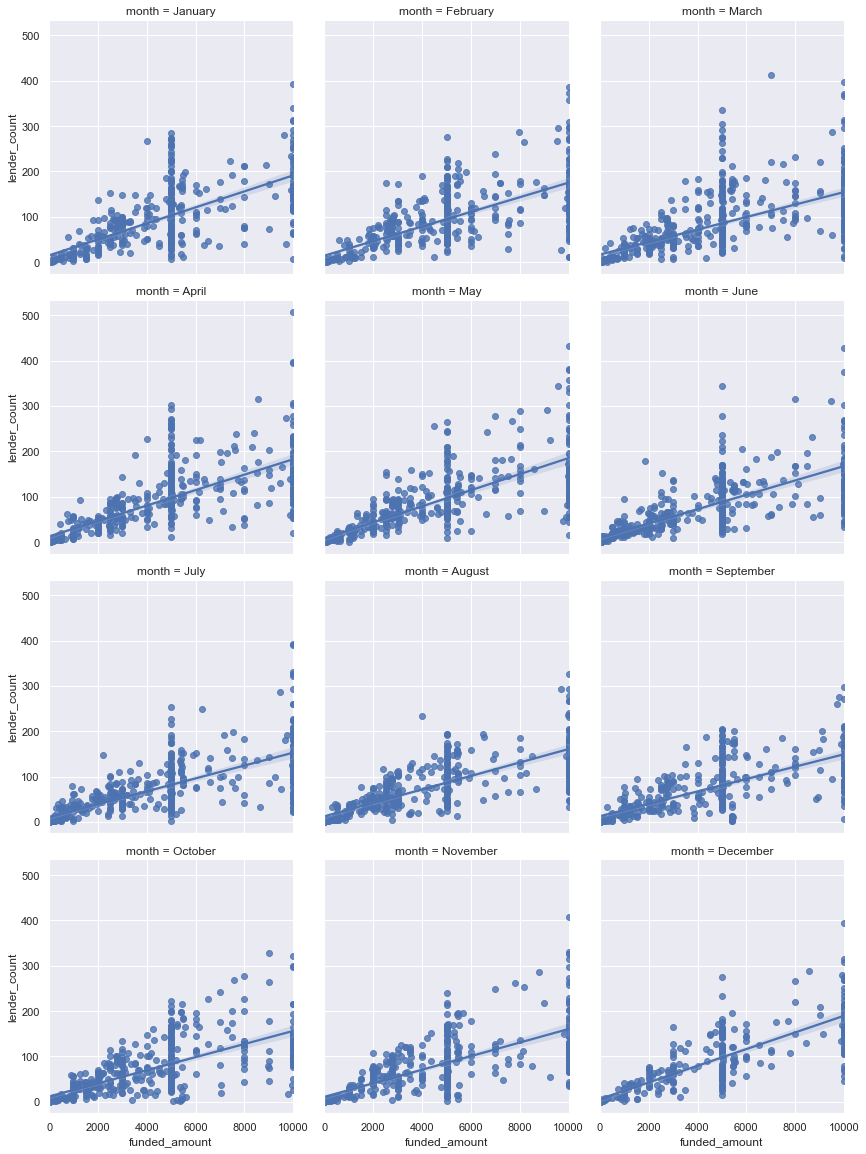

In [123]:
sns.lmplot(x="funded_amount", y="lender_count", col="month", data=usa,col_wrap=3, height=4)

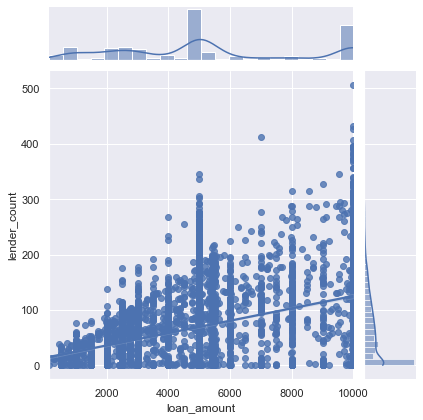

In [124]:
sns.jointplot(x="loan_amount", y="lender_count", data=usa, kind="reg")

## Seaborn Multi-Plot Grids

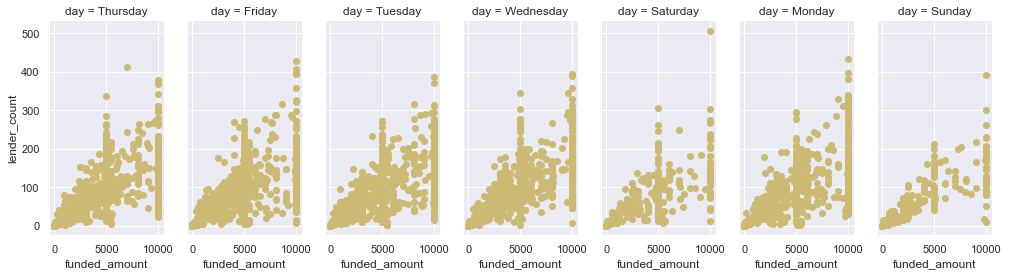

In [126]:
g = sns.FacetGrid(usa, col="day",height=4, aspect=.5)   # Multi-plot grid

g.map(plt.scatter, "funded_amount", "lender_count", color='y')

g.add_legend()

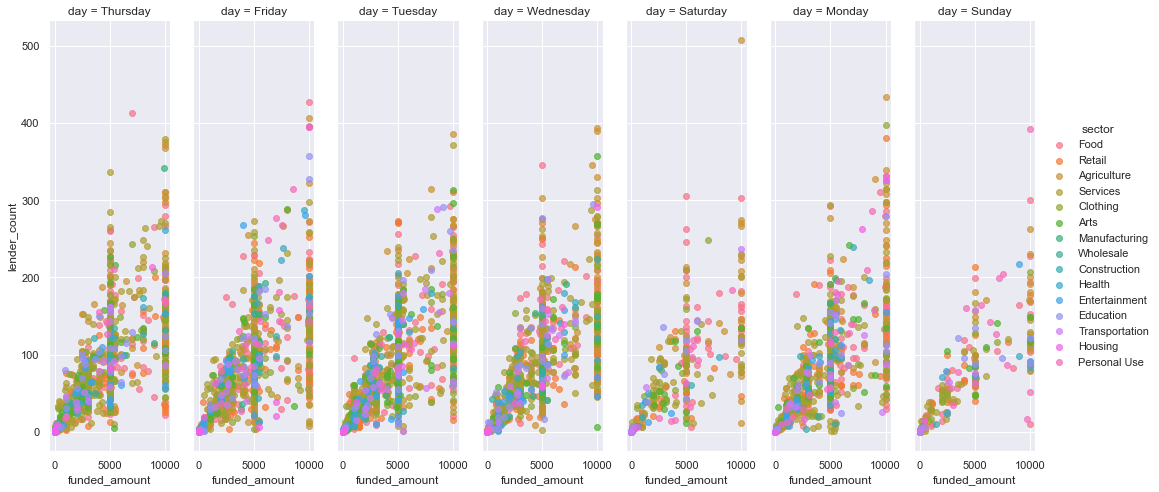

In [127]:
g = sns.FacetGrid(usa, col="day",height=7, aspect=0.3,hue="sector")

g.map(plt.scatter, "funded_amount", "lender_count", alpha=.7)

g.add_legend()

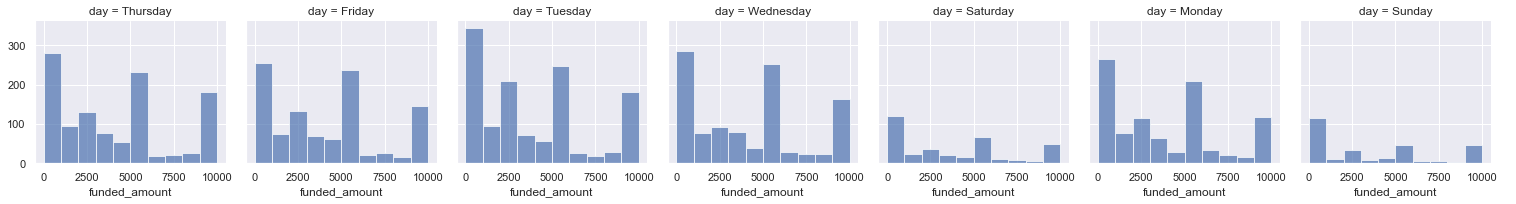

In [128]:
g = sns.FacetGrid(usa, col="day")

g.map(plt.hist, "funded_amount", alpha=.7)

g.add_legend()

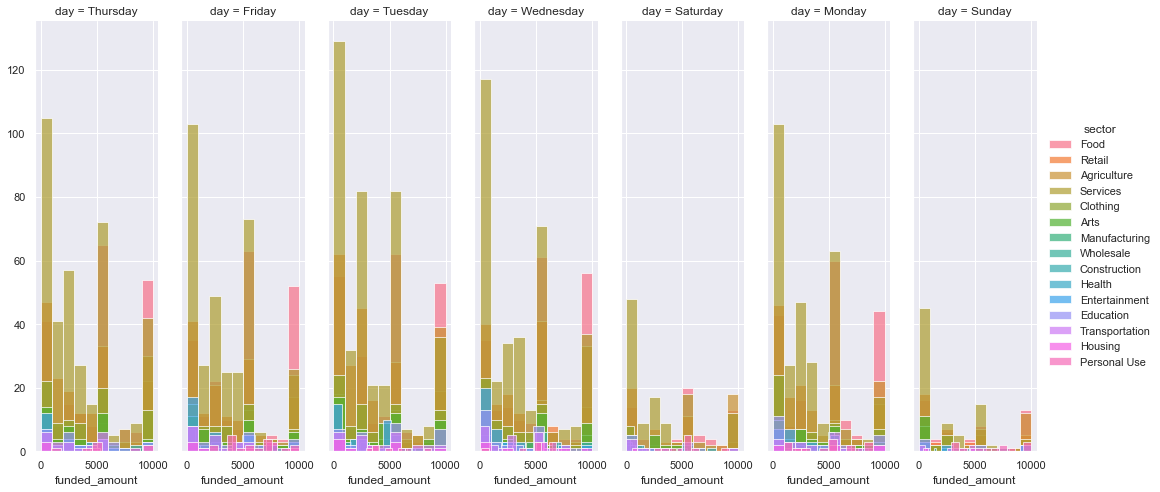

In [129]:
g = sns.FacetGrid(usa, col="day", height=7, aspect=0.3,hue="sector")

g.map(plt.hist, "funded_amount", alpha=.7)

g.add_legend()

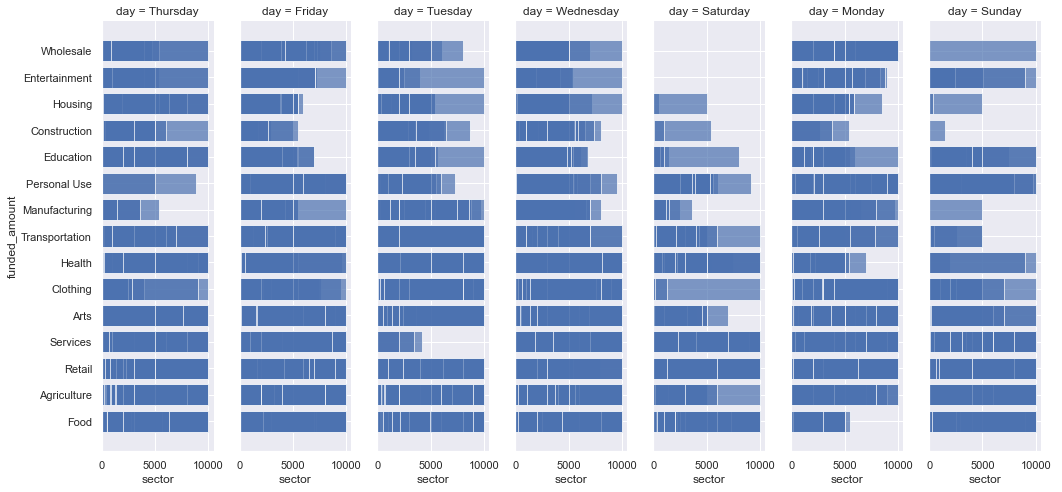

In [130]:
g = sns.FacetGrid(usa, col="day",height=7, aspect=0.3)

g.map(plt.barh, "sector", "funded_amount", alpha=.7)

g.add_legend()

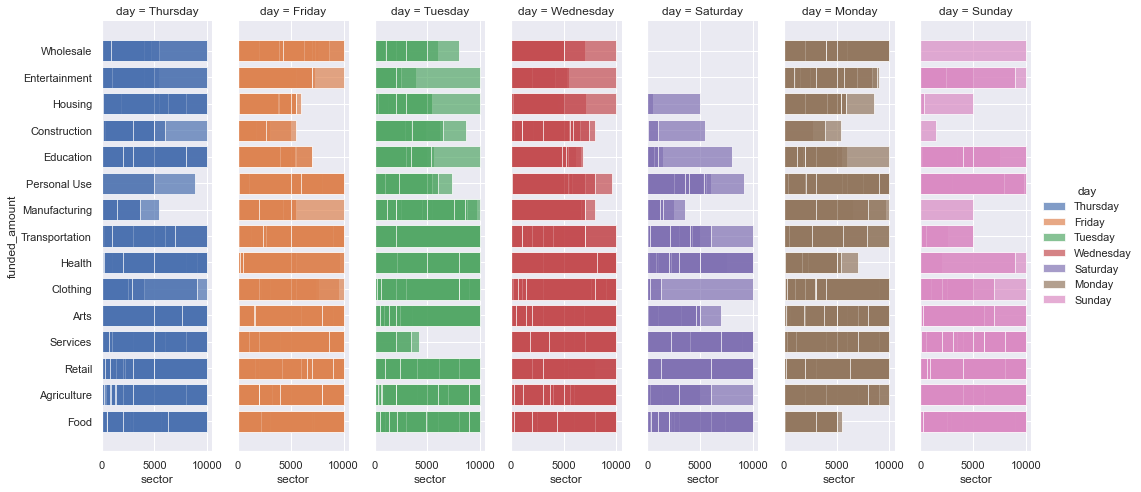

In [131]:
g = sns.FacetGrid(usa, col="day",height=7, aspect=0.3,hue='day')

g.map(plt.barh, "sector", "funded_amount", alpha=.7)

g.add_legend()

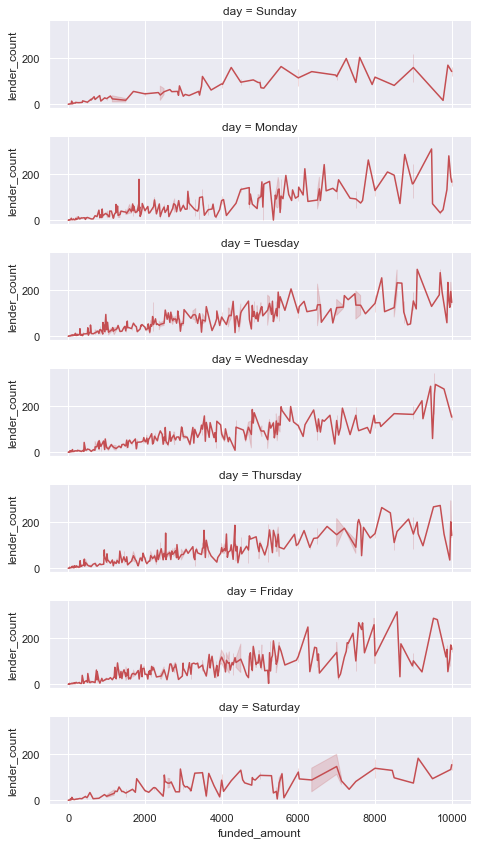

In [132]:
ordered_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

g = sns.FacetGrid(usa, row="day", row_order=ordered_days, height=1.7, aspect=4)

g.map(sns.lineplot, "funded_amount","lender_count",color='r')

### PairGrid

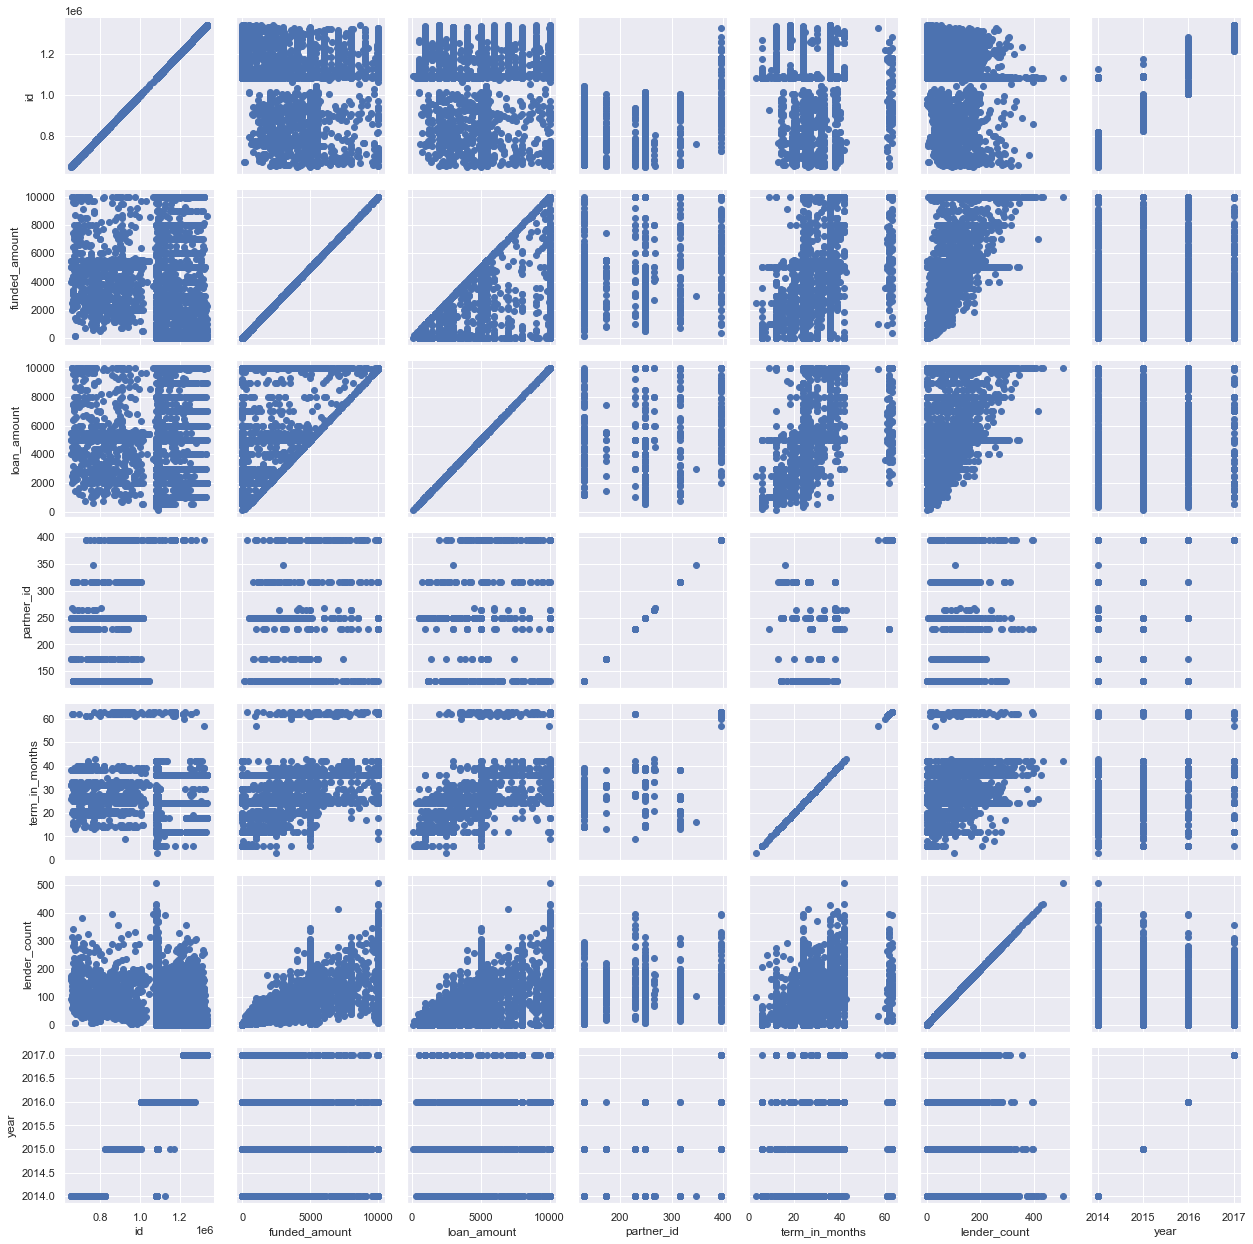

In [133]:
g = sns.PairGrid(usa)

g.map(plt.scatter)

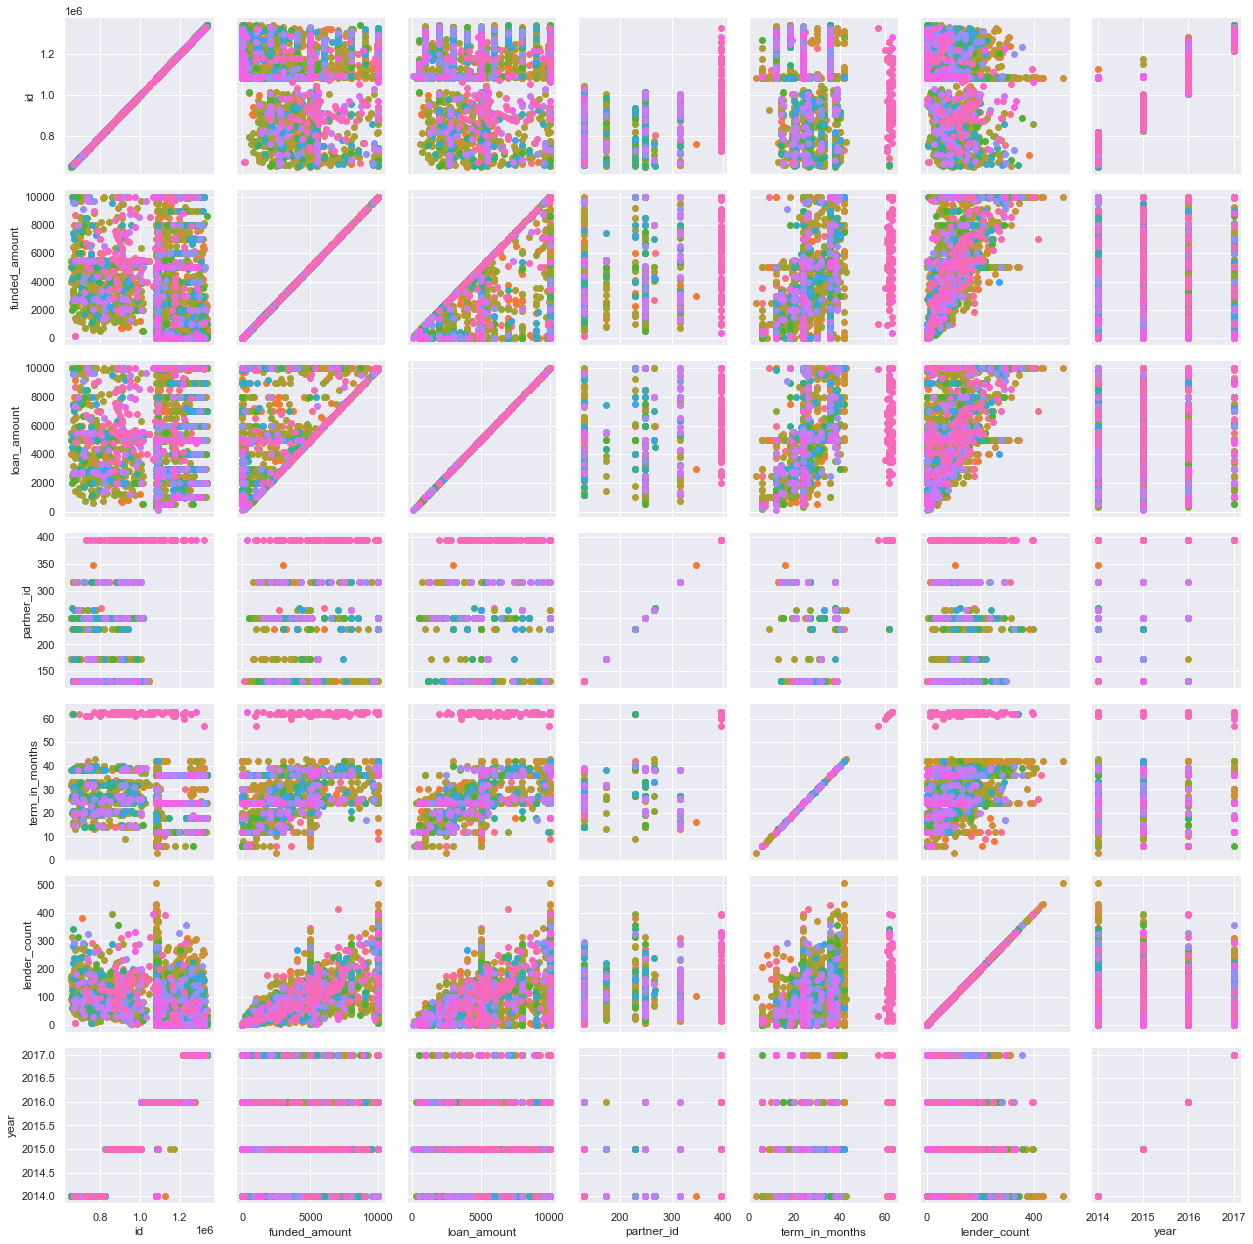

In [134]:
g = sns.PairGrid(usa,hue='sector')

g.map(plt.scatter)

### Word Cloud Section

In [135]:
from wordcloud import WordCloud, STOPWORDS # stopwords eg the, a, 

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
corpus = ' '.join(usa['use'].astype(str)) # a collection of sentences

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='grey',width=2400,height=2000).generate(corpus)

plt.figure(figsize=(12,15))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()